CNN -> NN - werjsa alfa do testowania poprawności działania sieci 


In [119]:
"""Instalacja pomocniczych, pythonowskich bibliotek obliczeniowych."""
! pip3 install numpy
! pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
CPU times: user 476 ms, sys: 154 ms, total: 630 ms
Wall time: 12.9 s


In [22]:
"""Instalacja narzędzi pomocniczych do modyfikacji kodu."""
! pip3 install - -upgrade autopep8

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 45 kB 272 kB/s eta 0:00:01
     |████████████████████████████████| 41 kB 58 kB/s  eta 0:00:01
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
CPU times: user 209 ms, sys: 50.8 ms, total: 260 ms
Wall time: 13.3 s


In [1]:
"""Instalacja zbioru danych EMNIST, reprezentującego znaki alfanumeryczne"""
! pip3 install emnist

UsageError: Line magic function `%` not found.


In [4]:
from emnist import extract_test_samples
from emnist import extract_training_samples
from emnist import list_datasets

"""Importowanie podzbioru typu balanced z EMNIST."""
list_datasets()

"""Przypisanie danych treningowych do poszczególnych zmiennych"""
train_images, train_labels = extract_training_samples(
    'balanced')  # przypisanie danych do poszczególnych zmiennych
print("Wymiary danych treningowych:", train_images.shape)
print("Wymiary etykiet od danych treningowych:", train_labels.shape)

"""Przypisanie danych testowych do poszczególnych zmiennych"""
test_images, test_labels = extract_test_samples('balanced')
print("\nWymiary danych testowych:", test_images.shape)
print("Wymiary etykiet od danych testowych:", test_labels.shape)
print("\n")

Wymiary danych treningowych: (112800, 28, 28)
Wymiary etykiet od danych treningowych: (112800,)

Wymiary danych testowych: (18800, 28, 28)
Wymiary etykiet od danych testowych: (18800,)


CPU times: user 1.01 s, sys: 269 ms, total: 1.28 s
Wall time: 1.05 s


In [5]:
"""Wczytywanie wcześniej importowanych bibliotek."""
import numpy as np
import matplotlib.pyplot as plt
import math

CPU times: user 244 ms, sys: 24.4 ms, total: 268 ms
Wall time: 266 ms


CPU times: user 526 ms, sys: 3.07 ms, total: 529 ms
Wall time: 577 ms


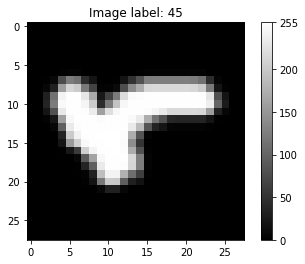

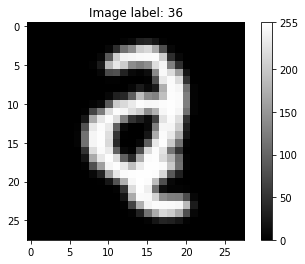

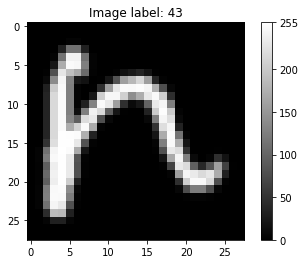

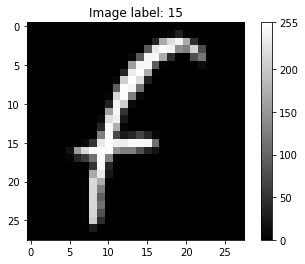

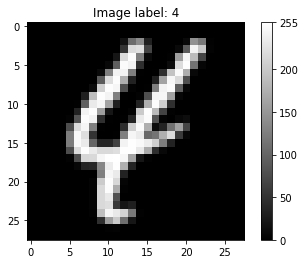

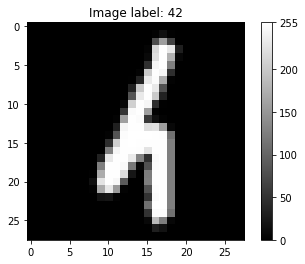

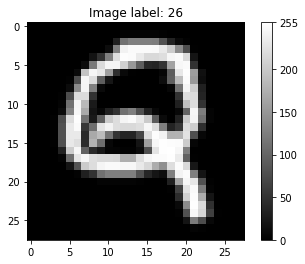

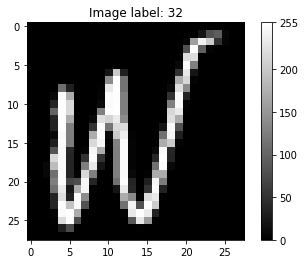

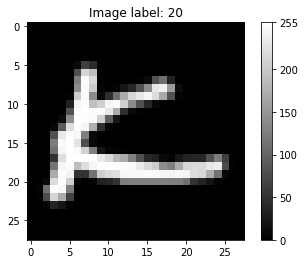

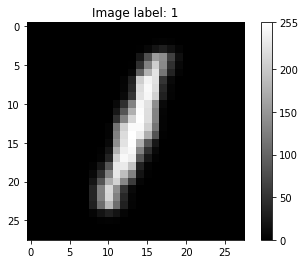

In [4]:
"""Wyświetlenie pierwszych dziesięciu elementów zbioru treningowego."""
for x in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(train_images[x], cmap='gray')
    ax.set_title("Image label: " + str(train_labels[x]))
    plt.colorbar(ticks=[0, 50, 100, 150, 200, 255], orientation='vertical')

CPU times: user 542 ms, sys: 3.98 ms, total: 546 ms
Wall time: 547 ms


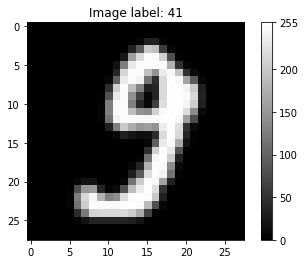

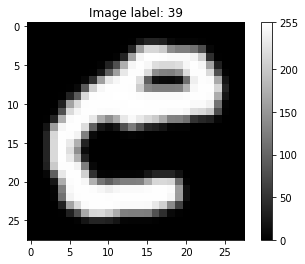

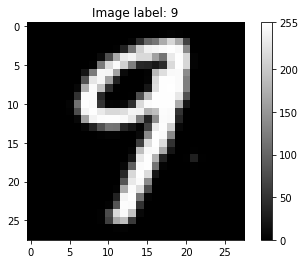

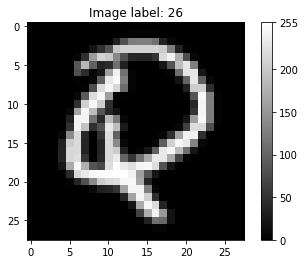

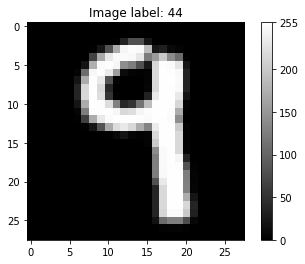

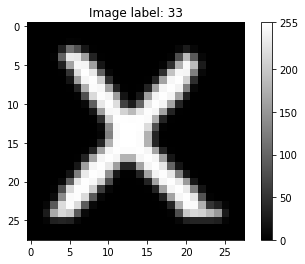

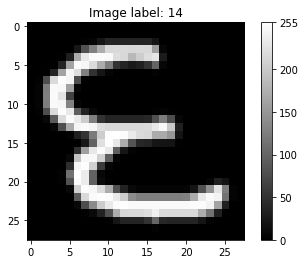

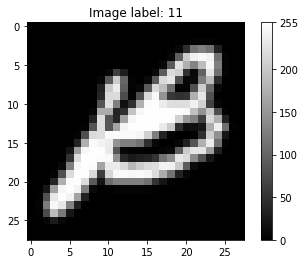

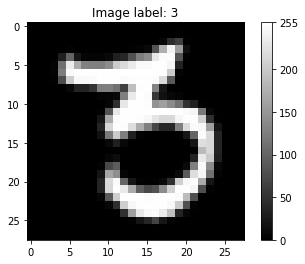

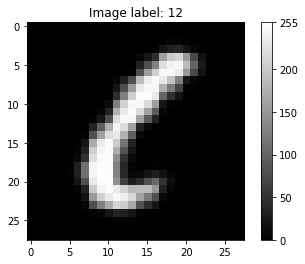

In [5]:
"""Wyświetlenie pierwszych dziesięciu elementów zbioru testowego."""
for x in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(test_images[x], cmap='gray')
    ax.set_title("Image label: " + str(test_labels[x]))
    plt.colorbar(ticks=[0, 50, 100, 150, 200, 255], orientation='vertical')

/home/igor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


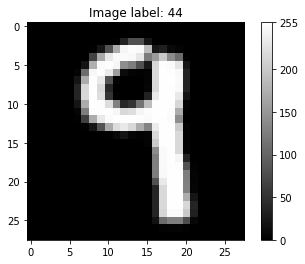

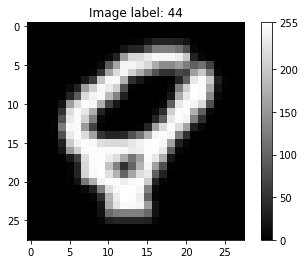

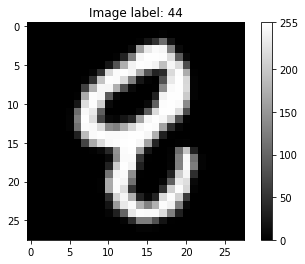

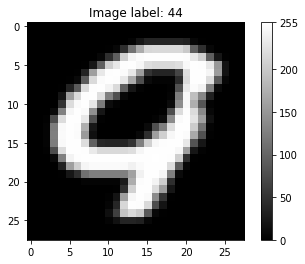

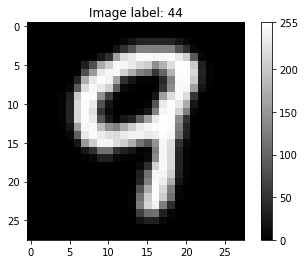

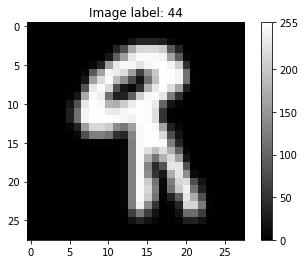

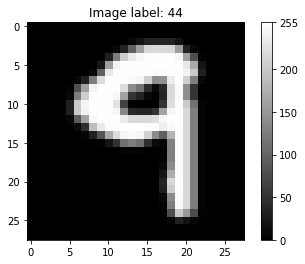

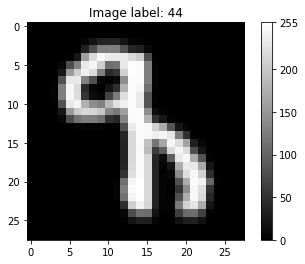

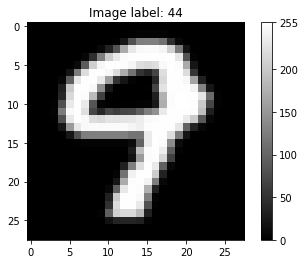

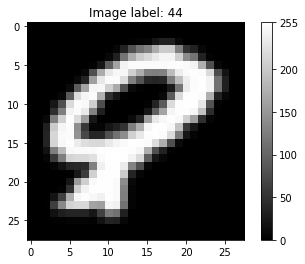

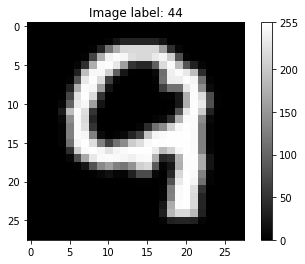

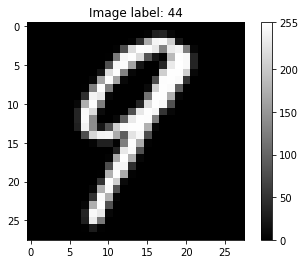

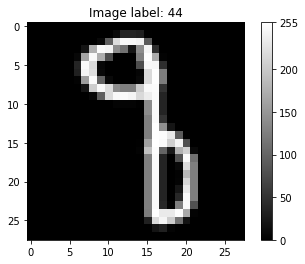

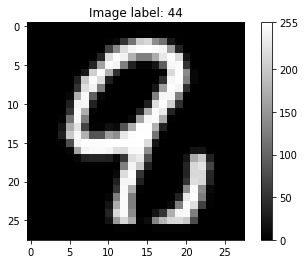

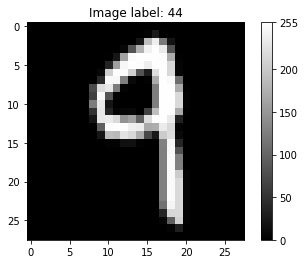

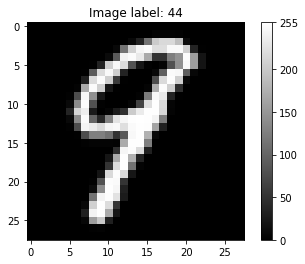

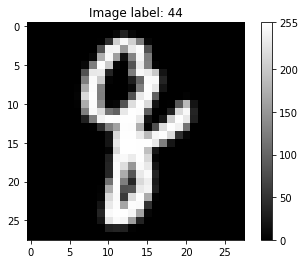

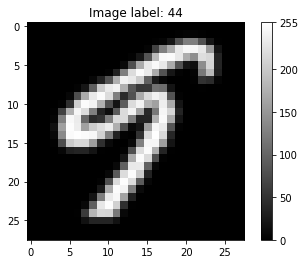

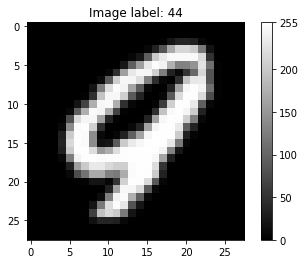

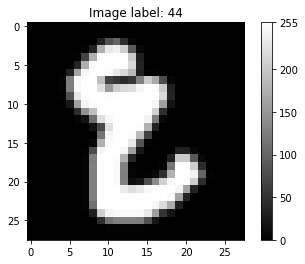

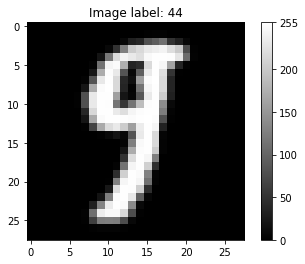

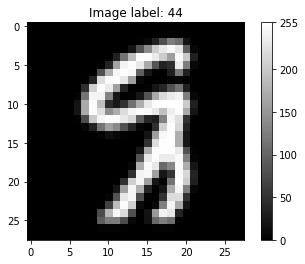

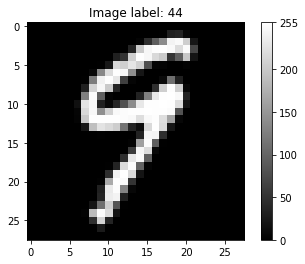

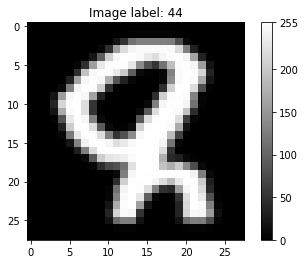

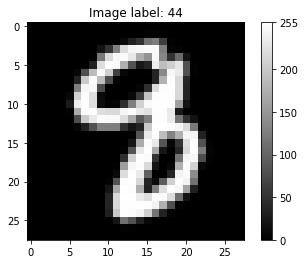

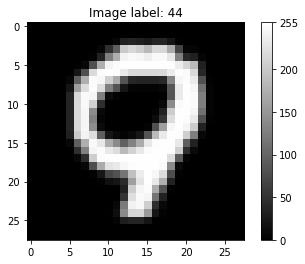

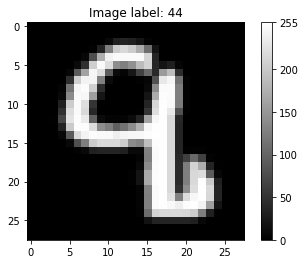

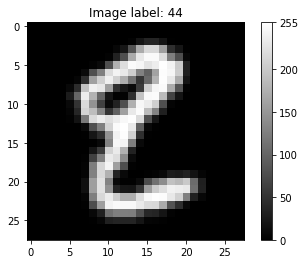

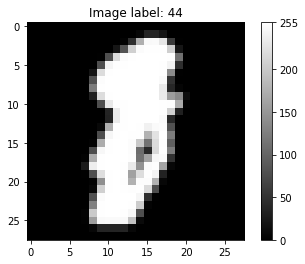

In [6]:
for x in range(1000):
    if test_labels[x] == 44:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        imgplot = plt.imshow(test_images[x], cmap='gray')
        ax.set_title("Image label: " + str(test_labels[x]))
        plt.colorbar(ticks=[0, 50, 100, 150, 200, 255], orientation='vertical')

In [4]:
"""Wyświetlenie etykiet zbioru uczącego oraz testowego."""
print("First 20 training set images labels:")
# nie musimy robić shuffle, bo wartości są już pomieszane. Czasem dane są posegregowane.
print(train_labels[:20])
print("\nFirst 20 testing images labels:")
print(test_labels[:20])
print("\n")

First 20 training set images labels:
[45 36 43 15  4 42 26 32 20  1 46 43 15 13 24 12  5 17  3 40]

First 20 testing images labels:
[41 39  9 26 44 33 14 11  3 12 16  7  2 16 16 27  6 44 28 45]


CPU times: user 2.2 ms, sys: 0 ns, total: 2.2 ms
Wall time: 6.16 ms


In [6]:
def normalize(x):
    '''
    Funkcja dokonująca zmiany wartości na zakres od 0 do 1 dla zakresu pikseli od 0 do 255.

    Args:
        x(int/arr): wartość poddawana normalizacji do zakresu od 0 do 1.

    Returns:
        Znormalizowana wartość x.
    '''

    return x/255.0

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.54 µs


In [7]:
def pad_with(vector, pad_width, iaxis, kwargs):
    '''
    Funkcja dodające obramowanie do macierzy wejśćiowej.

    Args:
        vector(arr): Tablica poddawana modyfikacji.
        pad_with(arr): Wartość obramowania.
        iaxis(arr): Oś obramowania.
    '''

    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


In [8]:
def sigmoid(x):
    '''
    Funkcja aktywacji sigmoid.

    Args:
        x(arr/int): przekazywana wartość do funkcji.

    Returns:
        (float): Wartość funkcji sigmoid. Zakres liczbowy (0:1)

    '''
    return 1 / (1 + np.exp(-x))


def relu(x):
    '''
    Funkcja aktywacji ReLu.

    Args:
        x(arr/int): przekazywana wartość do funkcji.

    Returns:
        (int/float):Wartość funkcji ReLu. Zakres liczbowy (0:inf)

    '''
    return np.maximum(0.0, x)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [96]:
# Klasa reprezentująca warstwę konwolucyjną - wersja nr 2 dla wielu filtrów 3d

class ConvolutionalLayer:
    """Klasa reprezentująca warstwę konwolucyjną, jej paramtery, generowanie filtrów, operację konwolucji."""

    def __init__(self, filters_num, filter_h, filter_w, filter_d, stride, cnn_layer_no, padding):
        """Konstruktor klasy.

        Args:
            filters_num(int): Ilość filtrów.
            filter_h(int): Wysokość filtra.
            filter_w(int): Szerokość filtra.
            filter_d(int): Głębokość filtra.
            stride(int): Krok w operacji konwolucji

        """
        self.filters_num = filters_num
        self.stride = stride
        self.filter_h = filter_h
        self.filter_w = filter_w
        self.filter_d = filter_d
        self.cnn_layer_no = cnn_layer_no
        self.padding = padding.capitalize()

        """Losowe filtry z zakresu od 0 do 1"""

        """najszybsza i najładniejsza opcja"""
        self.filters = np.array([np.random.rand(
            self.filter_d, self.filter_h, self.filter_w) - 0.5 for x in range(self.filters_num)])

        """Wygenerowanie biasów."""
        self.biases = np.ones(self.filters_num)

    def conv_process(self, input):
        """Operacja konwolucji/splotu na zadanym obrazie.

        Args:
            input(numpy array): Obraz wejściowy.

        """
        self.input = input

        """Odczytanie wymiarów obrazu w zależnoścci od ilości kanałów"""
        if len(self.input.shape) == 2:
            self.height, self.width = self.input.shape  # wymiary zwykłego obrazu 2d
        else:
            self.depth, self.height, self.width = self.input.shape  # wymiary zwykłego obrazu 3d

        """Sprawdzenie czy głębokość filtra odpowiada głębokości kanału."""
        if (len(self.input.shape) == 3 and self.depth == self.filter_d) or len(self.input.shape) == 2:

            """Dodanie paddingu do danych wejściowych."""
            if self.padding == "True":
                self.image_padded = np.pad(self.input, 1, pad_with)
                if len(self.input.shape) == 3:
                    # wycinamy kanały pierwszy i ostatni złożone z samych zer
                    self.image_padded = self.image_padded[1:-1]
            else:
                self.image_padded = self.input

            """Odczytanie wymiarów obrazu z paddingiem w zależnoścci od ilości kanałów."""
            if len(self.input.shape) == 2:
                # wymiary obrazu z paddingiem
                self.height_pad, self.width_pad = self.image_padded.shape
            else:
                # wymiary obrazu 3d z paddinguem
                self.height_pad, self.width_pad = self.image_padded.shape[1:]

            """Końcowa granica pętli dokonującej operacji konwolucji/splotu."""
            self.stride_range = int(
                ((self.width - self.filter_w + 2 * 1) / self.stride) + 1)

            """Wymiary macierzy wyjściowej."""
            self.shape_dim = int(
                ((self.width - self.filter_w + 2 * 1) / self.stride) + 1)

            """tablica pomocnicza dla wyników."""
            self.conv_output = np.zeros(
                (self.filters_num, self.shape_dim, self.shape_dim))

            """Proces konwolucji."""
            for f in range(self.filters_num):
                y = 0
                for h in range(0, self.stride_range, self.stride):
                    x = 0
                    for w in range(0, self.stride_range, self.stride):
                        """Wyznaczenie przestrzeni danych wejściowych 3d lub obszaru 2d do konwolucji."""
                        if len(self.input.shape) == 3:

                            # [depth, height, width]
                            self.temp_arr = self.image_padded[0:self.depth,
                                                              h:h + self.filter_h, w:w + self.filter_w]

                        else:

                            self.temp_arr = self.image_padded[h:h +
                                                              self.filter_h, w:w + self.filter_w]
                        self.conv = (np.multiply(
                            self.filters[f], self.temp_arr)).mean() + self.biases[f]
                        self.conv_output[f][y][x] = self.conv
                        x += 1
                    y += 1

            self.conv_output = np.where(
                self.conv_output > 255, 255, self.conv_output)

        else:
            print("Głębokość filtra różni się od głębokości danych wejśćiowych. Proces kowolucji nie został wykonany.")

    def backwards(self, dvalues):
        """Funkcja dokonująca wstecznej propagacji warstwy konwolucyjnej.

        Args:
              dvalues(numpy array): Obraz wejściowy ze wstecznej propagacji.

        """
        self.dvalues = dvalues
        self.dv_filters_180 = np.copy(self.filters)

        # obrócenie filtrów o 180 stopni względem osi X i Y
        for i in range(self.filters_num):
            for d in range(self.filter_d):
                self.dv_filters_180[i][d] = np.rot90(
                    self.dv_filters_180[i][d], 2, axes=(0, 1))
        # Transponowanie filtrów w celu zgodności wymiarów dla wstecznej propagacji
        # Zmiana miejscami osi: ilość filtrów, głębokość
        self.dv_filters_T = np.moveaxis(self.dv_filters_180, 0, 1)
        self.dv_filters_num, self.dv_filters_d, self.dv_filters_h, self.dv_filters_w = self.dv_filters_T.shape
        """Odczytanie wymiarów obrazu w zależnoścci od ilości kanałów"""
        if len(self.dvalues.shape) == 2:
            self.dv_height, self.dv_width = self.dvalues.shape  # wymiary zwykłego obrazu 2d
        else:
            # wymiary zwykłego obrazu 3d
            self.dv_depth, self.dv_height, self.dv_width = self.dvalues.shape

        """padding"""
        if len(self.dvalues.shape) == 2:
            self.dvalues_padded = np.pad(self.dvalues, 1, pad_with)
        else:
            self.dvalues_padded = np.pad(self.dvalues, 1, pad_with)
            # wycinamy kanały pierwszy i ostatni złożone z samych zer
            self.dvalues_padded = self.dvalues_padded[1:-1]

        """Odczytanie wymiarów obrazu z paddingiem w zależnoścci od ilości kanałów."""
        if len(self.dvalues.shape) == 2:
            # wymiary obrazu z paddingiem
            self.dv_height_pad, self.dv_width_pad = self.dvalues_padded.shape
        else:
            # wymiary obrazu 3d z paddinguem
            self.dv_height_pad, self.dv_width_pad = self.dvalues_padded.shape[1:]

        """Końcowa granica pętli dokonującej operacji konwolucji/splotu."""
#         self.dv_stride_range = int(self.dv_width_pad - np.ceil(self.filter_w/2)) # dla obrazu o wymiarze 28x28 i 30x30(z paddingiem) stride_range = 30
        self.dv_stride_range = int(
            ((self.dv_width - self.filter_w + 2 * 1) / self.stride) + 1)

        """Wymiary macierzy wyjściowej."""
        self.dv_shape_dim = int(
            ((self.dv_width - self.filter_w + 2 * 1) / self.stride) + 1)

        """tablica pomocnicza dla wyników."""
        self.conv_dvalues = np.zeros(
            (self.dv_filters_num, self.dv_shape_dim, self.dv_shape_dim))

        if self.cnn_layer_no != 1:
            """Proces konwolucji."""
            for f in range(self.dv_filters_num):
                y = 0
                for h in range(0, self.dv_stride_range, self.stride):
                    x = 0
                    for w in range(0, self.dv_stride_range, self.stride):
                        """Wyznaczenie przestrzeni danych wejściowych 3d lub obszaru 2d do konwolucji."""
                        if len(self.dvalues.shape) == 3:
                            # [depth, height, width]
                            self.dv_temp_arr = self.dvalues_padded[0:self.dv_depth,
                                                                   h:h + self.dv_filters_h, w:w + self.dv_filters_w]
                        else:
                            self.dv_temp_arr = self.dvalues_padded[h:h +
                                                                   self.dv_filters_h, w:w + self.dv_filters_w]

                        self.dv_conv = (np.multiply(
                            self.dv_filters_T[f], self.dv_temp_arr)).mean()

                        self.conv_dvalues[f][y][x] = self.dv_conv

                        x += 1
                    y += 1

        """WSTECZNA PROPAGACJA DLA FILTRÓW"""
        # filtry

        """Wsteczna propagacjia dla filtrów v4."""

        if len(self.image_padded.shape) == 2:
            self.image_padded_backprop = self.image_padded[np.newaxis, :, :]
        else:
            self.image_padded_backprop = self.image_padded

        if len(self.dvalues) == 2:
            self.dvalues_backprop = self.dvalues[np.newaxis, :, :]
        else:
            self.dvalues_backprop = self.dvalues

        """v1"""
        self.dw_filters = np.zeros(self.filters.shape)
        for f in range(self.filters_num):
            divider = np.count_nonzero(self.dvalues_backprop[f] > 0)
            for d in range(self.filter_d):
                y = 0
                for h in range(0, self.dv_stride_range, self.stride):
                    x = 0
                    for w in range(0, self.dv_stride_range, self.stride):
                        self.dw_filters[f][d] += (self.image_padded_backprop[d, h:h + self.dv_filters_h, w:w + self.dv_filters_w])*(
                            self.dv_filters_w * self.dv_filters_w) * self.dvalues_backprop[f][y][x]
                        x += 1
                    y += 1

        self.dv_biases = np.zeros(self.biases.shape)
        for n in range(self.filters_num):
            self.dv_biases[n] = np.sum(self.dvalues_backprop[n])

    def update(self, learning_rate):
        self.learning_rate = learning_rate

        self.biases = self.biases - learning_rate * self.dv_biases
        self.filters = self.filters - learning_rate * self.dw_filters

CPU times: user 23 µs, sys: 26 µs, total: 49 µs
Wall time: 53.6 µs


In [25]:
f_min, f_max = np.amin(img1), np.amax(img1)
img1 = (img1 - f_min) / (f_max - f_min)

NameError: name 'img1' is not defined

In [339]:
c1 = ConvolutionalLayer(1, 5, 5, 1, 1, 2, "true")
print(c1.filters)
c1.conv_process(train_images[0])
print(c1.conv_output.shape)

[[[[ 0.00374093  0.0067056  -0.00680757  0.00205282 -0.01466164]
   [-0.01980211 -0.01760189 -0.00954274 -0.00418502 -0.0121712 ]
   [ 0.01260521  0.00274369 -0.01862251 -0.00043594 -0.00683761]
   [-0.00026453 -0.01975621 -0.01131932 -0.01347095 -0.00136501]
   [ 0.01673534  0.00366962 -0.00290936 -0.00221203  0.0003401 ]]]]
self.stride_range: 26
self.shape_dim:  26
(1, 26, 26)


(1, 26, 26)


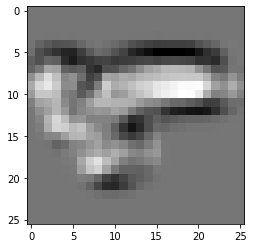

-----------------------------------------------


In [333]:
print(c1.conv_output.shape)
for x in c1.conv_output:
    img1 = x
    f_min, f_max = img1.min(), img1.max()
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))
    print("-----------------------------------------------")

In [336]:
c1.backwards(c1.conv_output)
print(c1.filters)
print(c1.dv_filters_180)
print(c1.conv_output)
print(c1.conv_output.shape)

[[[[-0.00666086 -0.00925853 -0.0117243  -0.01109661 -0.00026395]
   [ 0.0111463   0.00238912  0.00157938  0.00632755  0.00517776]
   [ 0.01439489 -0.00566828  0.01103788  0.02022161  0.02383898]
   [-0.00330104 -0.01421785  0.00199557  0.00144358 -0.00280892]
   [ 0.00300482 -0.00828409 -0.01003903  0.00086686 -0.01693927]]]]
[[[[-0.01693927  0.00086686 -0.01003903 -0.00828409  0.00300482]
   [-0.00280892  0.00144358  0.00199557 -0.01421785 -0.00330104]
   [ 0.02383898  0.02022161  0.01103788 -0.00566828  0.01439489]
   [ 0.00517776  0.00632755  0.00157938  0.00238912  0.0111463 ]
   [-0.00026395 -0.01109661 -0.0117243  -0.00925853 -0.00666086]]]]
[[[ 1.00000000e-06  1.00000000e-06  1.00000000e-06  1.00000000e-06
    1.00000000e-06  1.00000000e-06  1.00000000e-06  1.00000000e-06
    1.00000000e-06  1.00000000e-06  1.00000000e-06  1.00000000e-06
    1.00000000e-06  1.00000000e-06  1.00000000e-06  1.00000000e-06
    1.00000000e-06  1.00000000e-06  1.00000000e-06  1.00000000e-06
    1.000

In [28]:
print(b1.shape)
print(b1)
print("\n")
print(b2.shape)
print(b2)
print("\n")
print(f1.shape)
print(f1)
print(f2.shape)
print(f2)

(1, 6, 6)
[[[1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]]]


(2, 6, 6)
[[[1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]]

 [[1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]]]


(1, 3, 3)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
(2, 3, 3)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [29]:
print(b1)
print(f1)

[[[1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]
  [1 2 3 4 5 6]]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [318]:
c1 = ConvolutionalLayer(1, 5, 5, 1, 1, 1, "true")

if c1.filter_d == 1:
    c1.filters = f1
elif c1.filter_d == 2:
    c1.filters = f2

if c1.filter_h == 5:
    c1.filters = f5
elif c1.filter_h == 7:
    c1.filters = f7
print(c1.filters)

[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]
CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 1.41 ms


In [319]:
print(c1.padding)
print(c1.filters.shape)
c1.conv_process(b1)
print(b1.shape)
print(c1.conv_output.shape)

True
(1, 5, 5)
self.stride_range: 4
self.shape_dim:  4
(1, 6, 6)
(1, 4, 4)
[[[1.600001 2.400001 3.200001 2.880001]
  [2.000001 3.000001 4.000001 3.600001]
  [2.000001 3.000001 4.000001 3.600001]
  [1.600001 2.400001 3.200001 2.880001]]]


In [320]:
print(c1.image_padded.shape)
print(c1.image_padded)
print("\n")
print(c1.conv_output)

(1, 8, 8)
[[[0 0 0 0 0 0 0 0]
  [0 1 2 3 4 5 6 0]
  [0 1 2 3 4 5 6 0]
  [0 1 2 3 4 5 6 0]
  [0 1 2 3 4 5 6 0]
  [0 1 2 3 4 5 6 0]
  [0 1 2 3 4 5 6 0]
  [0 0 0 0 0 0 0 0]]]


[[[1.600001 2.400001 3.200001 2.880001]
  [2.000001 3.000001 4.000001 3.600001]
  [2.000001 3.000001 4.000001 3.600001]
  [1.600001 2.400001 3.200001 2.880001]]]


In [37]:
t = train_images[0]
print(t.shape)

(28, 28)


In [38]:
print(c1.filters)
print(c1.biases)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[1.]


In [10]:
# Klasa reprezentująca warstwę funkcji aktywacji ReLu - Rectified Linear Unit
class ReLu:
    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.array([relu(x) for x in self.inputs])

    def backwards(self, dvalues):

        self.dvalues = dvalues

        self.dvalues_reshaped = self.dvalues.reshape(self.inputs.shape)

        self.dinputs = self.dvalues_reshaped.copy()

        self.dinputs[self.inputs <= 0] = 0

CPU times: user 27 µs, sys: 5 µs, total: 32 µs
Wall time: 34.8 µs


In [11]:
"""Wersja najnowsza z dnia 06-04-2021."""
# Klasa reprezentująca warstwę pooling


class MaxPooling:
    def __init__(self, pooling_dim, stride):
        self.pooling_dim = pooling_dim
        self.stride = stride

    def forwards(self, input):
        """Funkcja przekazująca wartości w głąb sieci."""
        self.input = input

        """Odczytanie wymiarów wejścia w zależności od ilości kanałów."""
        if len(self.input.shape) == 2:
            self.height, self.width = self.input.shape  # wymiary dla danych wejścowych 2d
        else:
            # wymiary dla danych wejściowych 3d
            self.depth, self.height, self.width = self.input.shape

        """Obliczenie wymiarów wyjściowych w osi X/Y po operacji poolingu."""
        # W2 = (W1 - F) / S + 1
        self.output_dim = int(
            np.ceil((self.height - self.pooling_dim) / self.stride + 1))

        """Zdefiniowanie pierwotnej, pomocniczej macierzy(tensora) wyjściowej złożonej z zer."""
        if len(self.input.shape) == 2:
            self.pooling_output = np.zeros((self.output_dim, self.output_dim))
        else:
            self.pooling_output = np.zeros(
                (self.depth, self.output_dim, self.output_dim))

        """Tablica pomocnicza do zapisania współrzędnych max wartości poolingu."""
        self.pooling_coordinates = self.input.copy()

        def pooling_ranges(iter_range, pooling_dim, input_dim):
            """Funkcja zwracająca wymiary zakresu poolingu, w przypadku,
                gdy wykroczy on poza zakres macierzy wejściowej.

            Args:
                iter_range(int): Wymiar(wyokość/szerokość) macierzy wynikający z iteracji.
                pooling_dim(int): Wymiar zakresu poolingu.
                input_dim(int): Wymiar(wyokość/szerokość) macierzy wejśćiowej

            Return:
                start(int): Początek zakresu poolingu.
                end(int): Koniec zakresu poolingu

            """
            if iter_range + pooling_dim > input_dim:
                start = input_dim - pooling_dim
                end = input_dim
            else:
                start = iter_range
                end = iter_range + pooling_dim
            return start, end

        """Operacja poolingu odpowiednio dla jednego kanału oraz więcej niż jeden."""
        if len(self.input.shape) == 2:
            y = 0  # wymiar po wysokości tablicy wyjściowej
            for h in range(0, self.height, self.stride):
                x = 0  # wymiar po szerokości tablicy wyjściowej

                """Sprawdzenie, czy zakres poolingu nie wychodzi poza wysokość macierzy."""
                self.height_start, self.height_end = pooling_ranges(
                    h, self.pooling_dim, self.height)

                for w in range(0, self.width, self.stride):

                    """Sprawdzenie, czy zakres poolingu nie wychodzi poza szerokość macierzy."""
                    self.width_start, self.width_end = pooling_ranges(
                        w, self.pooling_dim, self.width)

                    self.area = self.input[self.height_start:self.height_end,
                                           self.width_start:self.width_end]
                    self.pooling_output[y][x] = np.amax(self.area)

                    if self.pooling_output[y][x] != 0:
                        i_1, j_1 = np.where(
                            self.area == self.pooling_output[y][x])
                        if len(i_1) > 1 or len(j_1) > 1:
                            i_1 = [i_1[0]]
                            j_1 = [j_1[0]]
                        i_1 = i_1[0]
                        j_1 = j_1[0]
                        self.temp = np.zeros((self.stride, self.stride))
                        self.temp[i_1][j_1] = 1
                        self.pooling_coordinates[self.height_start:self.height_end,
                                                 self.width_start:self.width_end] = self.temp
                        self.coordinates_arr = []
                        for h_c in range(0, len(self.pooling_coordinates), 1):
                            for w_c in range(0, len(self.pooling_coordinates[0]), 1):
                                if self.pooling_coordinates[h_c][w_c] == 1:
                                    self.coordinates_arr.append([h_c, w_c])

                        """TRZEBA POPRAWIĆ NA NORMALNY, czytelny KOD..."""

                    x += 1
                y += 1
        else:
            self.coordinates_arr = []
            for d in range(0, self.depth):
                y = 0  # wymiar po wysokości tablicy wyjściowej
                # print(len(self.coordinates_arr))
                for h in range(0, self.height, self.stride):
                    x = 0  # wymiar po szerokości tablicy wyjściowej

                    """Sprawdzenie, czy zakres poolingu nie wychodzi poza wysokość macierzy."""
                    self.height_start, self.height_end = pooling_ranges(
                        h, self.pooling_dim, self.height)

                    for w in range(0, self.width, self.stride):

                        """Sprawdzenie, czy zakres poolingu nie wychodzi poza szerokość macierzy."""
                        self.width_start, self.width_end = pooling_ranges(
                            w, self.pooling_dim, self.width)

                        # print(self.input[d, self.height_start:self.height_end, self.width_start:self.width_end])
                        self.area = self.input[d, self.height_start:self.height_end,
                                               self.width_start:self.width_end]
                        self.pooling_output[d][y][x] = np.amax(self.area)

                        """Wynaczenie występowania wszystkich max wartośći z max poolingu."""
                        i_1, j_1 = np.where(
                            self.area == self.pooling_output[d][y][x])
                        if len(i_1) > 1 or len(j_1) > 1:
                            i_1 = [i_1[0]]
                            j_1 = [j_1[0]]
                        i_1 = i_1[0]
                        j_1 = j_1[0]
                        self.temp = np.zeros((self.stride, self.stride))
                        self.temp[i_1][j_1] = 1
                        self.pooling_coordinates[d, self.height_start:self.height_end,
                                                 self.width_start:self.width_end] = self.temp

                        x += 1
                    y += 1

            """"Przypisanie współrzędnych z max poolingu do tablicy."""
            for d_c in range(0, self.depth, 1):
                for h_c in range(0, len(self.pooling_coordinates[0]), 1):
                    for w_c in range(0, len(self.pooling_coordinates[0]), 1):
                        if self.pooling_coordinates[d_c][h_c][w_c] == 1:
                            self.coordinates_arr.append([d_c, h_c, w_c])

    def backwards1(self, dvalues):
        """Funkcja wstecznej propagacji."""
        self.dvalues = dvalues
        # algorytm dokonujący zmiany wymiarów na 2D / 3D w zależoności od danych wejściowych
        if len(self.dvalues.shape) == 1:
            self.reshaped_input = self.dvalues.reshape(
                self.pooling_output.shape)
        elif len(self.dvalues.shape) == 2:
            self.dvalues_height, self.dvalues_width = self.dvalues.shape
            if self.dvalues_height != self.dvalues_width:
                self.reshaped_input = self.dvalues.reshape(
                    self.pooling_output.shape)
            else:
                self.reshaped_input = self.dvalues
        else:
            self.reshaped_input = self.dvalues

        """Test max pooling jest dobrze zrobiony."""
        self.back_arr = np.zeros(self.input.shape)
        for x in range(len(self.coordinates_arr)):
            d, h, w = self.coordinates_arr[x]
            self.back_arr[d][h][w] = 1

        self.reshaped_depth, self.reshaped_height, self.reshaped_width = self.reshaped_input.shape
        self.dinput = self.back_arr.copy()
        i = 0
        for d in range(self.depth):  # for d in range(self.reshaped_depth):
            for h in range(self.height):
                j = 0
                for w in range(self.width):
                    if self.dinput[d][h][w] == 1:
                        self.dinput[d][h][w] = self.dinput[d][h][w] * \
                            (self.reshaped_input.flatten())[j]
                        j = j + 1
                i = i + 1

    def backwards(self, dvalues):
        """Funkcja wstecznej propagacji."""
        self.dvalues = dvalues

        if len((self.dvalues).shape) != 1:
            self.dvalues = self.dvalues.flatten()

        """Test max pooling jest dobrze zrobiony."""
        self.back_arr = np.zeros(self.input.shape)
        for x in range(len(self.coordinates_arr)):
            d, h, w = self.coordinates_arr[x]
            self.back_arr[d][h][w] = 1

        self.dinput = self.back_arr.copy()

        i = 0
        for d in range(self.depth):
            for h in range(self.height):
                for w in range(self.width):
                    if self.dinput[d][h][w] == 1:

                        self.dinput[d][h][w] = self.dinput[d][h][w] * \
                            self.dvalues[i]
                        i += 1

CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 52.2 µs


In [156]:
# DOBRA WERSJA, WSZYSTKO DZIAŁĄ ELEGANCKO
class NeuralNetwork6:

    def __init__(self, n_inputs, n_neurons, nn_layer_no):
        self.nn_layer_no = nn_layer_no
        """He weight initialization."""
        self.weights = np.random.rand(n_inputs, n_neurons) - 0.5
        self.biases = np.ones(n_neurons)

    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backwards(self, dvalues):
        """Funkcja dokonująca proces wstecznej propagacji błędu, wyznaczając zmianę/deltę wag oraz biasów.

        Args:
            dvalues(numpy array): wektor/macierz złożona z pochodnych, przekazanych wstecz, z warstwy następnej. 
        # """
        self.dvalues = dvalues
        self.dweights = np.dot(
            (self.inputs[np.newaxis, :]).T, self.dvalues[np.newaxis, :])  # wariant 2

        if self.nn_layer_no != 1:
            # wyznaczenie zmiennych idących dalej, podawanych do poprzedniej warstwy
            self.dinputs = np.dot(self.dvalues, self.weights.T)

        # biasy
        # wyznaczenie zmian/delt dla biasów
        self.dbiases = self.dvalues * np.ones(self.biases.shape)

    # SGD s 247 NN - można stworzyć osobną klasę do updatowania wag.
    def update(self, learning_rate):
        self.learning_rate = learning_rate

        self.biases = self.biases - learning_rate * self.dbiases
        self.weights = self.weights - learning_rate * self.dweights


class Sigmoid6:

    def forwards(self, inputs):
        self.output = sigmoid(inputs)

    def backwards(self, dvalues):
        # dE/do1 * do1/dzo1 | dE/dout * dout/dnet
        self.dinputs = dvalues * (1 - self.output) * self.output


class Softmax6:

    def forwards(self, inputs):
        self.inputs = inputs
        # zapobieganie wysokim wartościom exp / overflow
        self.exp_inputs = np.exp(self.inputs - np.max(self.inputs))
        self.exp_inputs_norm = self.exp_inputs / (np.sum(self.exp_inputs))

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = dvalues * \
            (self.exp_inputs_norm*(1-self.exp_inputs_norm))


class CrossEntropyLoss:

    def forwards(self, inputs, target):
        self.inputs = inputs
        self.target = target
        self.y_pred_clipped = np.clip(self.inputs, 1e-7, 1-1e-7)
        self.y_pred = (-1)*(np.sum(np.log(self.y_pred_clipped) * self.target))
        self.y_pred2 = -np.mean(np.log(self.y_pred_clipped) * self.target)

    def backwards(self, dvalues, target):
        self.dvalues = dvalues
        self.target = target
        samples = len(self.dvalues)
        self.dinputs = dvalues.copy()
        for x in range(len(self.dvalues)):
            self.dinputs[x] = self.dinputs[x] - target[x]
        self.dinputs = self.dinputs

    def backwards1(self, dvalues, y_true):
        samples = len(dvalues)
        self.y_true = y_true
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples


class Softmax_Cross():

    def __init__(self):
        self.actvation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def backwards(self, dvalues, target):
        self.target = target
        self.dvalues = dvalues
        self.dinputs = dvalues.copy()


# Klasa reprezentująca warstwę funkcji aktywacji ReLu - Rectified Linear Unit
class ReLu6:
    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = self.dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class LeakyReLu6:
    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.where(
            self.inputs > 0, self.inputs, self.inputs * 0.001)

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = self.dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0.001  # 0.0001


def flatten(inputs):
    return inputs.flatten()

CPU times: user 190 µs, sys: 26 µs, total: 216 µs
Wall time: 222 µs


In [13]:
# Klasa dropout do dezakatywowania losowych neuronówo zadany współczynnik procentowy
class Dropout:

    def __init__(self, drop_rate):
        self.drop_rate = drop_rate

    def forwards(self, inputs):
        self.inputs = inputs
        # jest 1 - drop_rate, bo w np.binomial okreslamy prawdopodobieństwo powodzenia. Czli 1 - 0.2 = 0.8
        self.drop_arr = np.random.binomial(
            1, 1 - self.drop_rate, size=self.inputs.shape) / (1 - self.drop_rate)
        self.output = self.inputs * self.drop_arr

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = self.dvalues * self.drop_arr

CPU times: user 37 µs, sys: 7 µs, total: 44 µs
Wall time: 48.2 µs


In [14]:
class Learning_Rate_Optim:

    def __init__(self, learning_rate, learning_rate_drop):
        self.learning_rate = learning_rate
        self.new_learning_rate = learning_rate
        self.learning_rate_drop = learning_rate_drop
        self.iteration = 0

    def learning_rate_change(self):
        self.new_learning_rate = self.learning_rate * \
            (1 / (1 + self.learning_rate_drop * self.iteration))
        self.iteration += 1

CPU times: user 34 µs, sys: 7 µs, total: 41 µs
Wall time: 45.5 µs


In [ ]:
np.save('n2 nn3 weights 31014k', nn3.weights)
np.save('n2 nn3 biases 31014k', nn3.biases)
np.save('n2 cnn1 filters 31014k', cnn1.filters)
np.save('n2 cnn1 biases 31014k', cnn1.biases)
np.save('n2 acc_tab_train 31014k', acc_tab_train)
np.save('n2 loss_tab_train 31014k', loss_tab_train)
np.save('n2 acc_tab_test 31014k', acc_tab_test)
np.save('n2 loss_tab_test 31014k', loss_tab_test)
print("Zapisano")

Zapisano
CPU times: user 3.32 ms, sys: 4.5 ms, total: 7.81 ms
Wall time: 8.7 ms


In [24]:
cnn_filters_start = np.load('acnn5 nn3 cnn1_filters start.npy')
nn_weights_start = np.load('acnn5 nn3 nn3_weights start.npy')
print("Poprawnie wczytano dane")

Poprawnie wczytano dane
CPU times: user 2.27 ms, sys: 379 µs, total: 2.65 ms
Wall time: 2.74 ms


In [150]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [158]:
"""Moduł trenowania"""
"""----------------------------------CNN8--------------------------------------------------"""


for t in range(1):

    cnn1 = ConvolutionalLayer(10, 5, 5, 1, 1, 1, "True")

    pool1 = MaxPooling(2, 2)

    relu1 = ReLu6()

    leaky_relu1 = LeakyReLu6()

    cnn2 = ConvolutionalLayer(5, 3, 3, 10, 1, 2, "True")

    cnn2.filters = np.array([np.random.rand(
        cnn2.filter_d, cnn2.filter_h, cnn2.filter_w) - 0.5 for x in range(cnn2.filters_num)])

    cnn2.biases = cnn2.biases

    pool2 = MaxPooling(2, 2)

    relu2 = ReLu6()

    leaky_relu2 = LeakyReLu6()

    nn1 = NeuralNetwork6(245, 47, 2)

    nn1_softmax = Softmax6()

    loss = CrossEntropyLoss()

    cnn1.filters = cnn1.filters * 0.1

    cnn1.biases = cnn1.biases * 1

    cnn2.filters = cnn2.filters * 0.1

    cnn2.biases = cnn2.biases * 1

    nn1.weights = nn1.weights * 0.00000000000000001

    nn1.biases = nn1.biases * 1

    lr = Learning_Rate_Optim(0.05, 0.05)  # dać po tym 0.005, 0.05

    dropout1 = Dropout(0.9)

    """----------------------------------TEST TRENINGU--------------------------------------------------"""
    acc_tab_train = []
    loss_tab_train = []
    acc_tab_test = []
    loss_tab_test = []
    for r in range(225):
        lr.learning_rate_change()
        k = 0
        loss_stats = [[] for x in range(47)]  # dla emnista
        loss1_list = []
        loss_stats2 = [[] for x in range(47)]  # dla emnista
        loss2_list = []
        train_batch_size = 11280
        train_batch_size = 500
        range_num = r*train_batch_size
        acc = 0
        acc_fin = 0
        acc_fin_ult = 0
        i = 0
        y = 1
        l = 0
        l2 = 0
        for x in range(range_num, range_num+train_batch_size):
            nn_input = train_images[x]
            nn_output = np.zeros(47)
            nn_output[train_labels[x]] = 1

            # CNN and NN forward propagation
            cnn1.conv_process(nn_input)  # CNN
            pool1.forwards(cnn1.conv_output)
            leaky_relu1.forwards(pool1.pooling_output)
            cnn2.conv_process(leaky_relu1.output)
            pool2.forwards(cnn2.conv_output)
            leaky_relu2.forwards(pool2.pooling_output)
            nn_input_flatten = (leaky_relu2.output).flatten()  # CNN
            nn1.forwards(nn_input_flatten)
            nn1_softmax.forwards(nn1.output)
            loss.forwards(nn1_softmax.exp_inputs_norm, nn_output)

            # NN loss
            print("Train iteration: " + str(x) + " | loss 1: " + str(loss.y_pred) +
                  " - label: " + str(train_labels[x]))  # !!!!!!!!!!!!!
            loss_stats[train_labels[x]].append(loss.y_pred)
            loss1_list.append(loss.y_pred)

            # NN backprop
            loss.backwards(nn1_softmax.exp_inputs_norm, nn_output)
            nn1.backwards(loss.dinputs)
            leaky_relu2.backwards(
                (nn1.dinputs).reshape(pool2.pooling_output.shape))
            pool2.backwards1(leaky_relu2.dinputs)
            cnn2.backwards(pool2.dinput)
            leaky_relu1.backwards(cnn2.conv_dvalues)
            pool1.backwards1(leaky_relu1.dinputs)
            cnn1.backwards(pool1.dinput)  # CNN

            # Update weight, biases and change learning rate
            nn1.update(lr.new_learning_rate*1)  # 1
            cnn2.update(lr.new_learning_rate*0.1)  # 0.1
            cnn1.update(lr.new_learning_rate*0.01)  # 0.001

            print(lr.new_learning_rate)
            print("\ncnn1", cnn1.filters[5][0][0])
            print("cnn2", cnn2.filters[3][0][0])
            print("nn1", nn1.weights[90][0])
            print(
                "-----------------------------------------------------------------------------------")

            acc = 1 if np.argmax(
                nn1_softmax.exp_inputs_norm) == train_labels[x] else 0

            acc_fin += acc
            l += loss.y_pred
            acc_fin_ult += acc
            l2 += loss.y_pred2

        acc_tab_train.append(acc_fin/train_batch_size)
        loss_tab_train.append(l/train_batch_size)

        acc_fin = acc_fin/train_batch_size
        print("Accuracy:", acc_fin*100, "% Loss:", l /
              train_batch_size, "Loss:", l2/train_batch_size)

print("ACC FIN ULT", acc_fin_ult/10000)

Train iteration: 0 | loss 1: 3.8501476017100584 - label: 45
0.05

cnn1 [-0.02672318  0.03836099 -0.04513378 -0.01248915 -0.04307389]
cnn2 [ 0.004847   -0.01811715  0.01945906]
nn1 -0.0010647307301582297
-----------------------------------------------------------------------------------
Train iteration: 1 | loss 1: 12.329443897746216 - label: 36
0.05

cnn1 [-0.02717577  0.0379208  -0.04553472 -0.0128936  -0.04350995]
cnn2 [-0.15906052 -0.16607893 -0.13242944]
nn1 -0.0010649518921948032
-----------------------------------------------------------------------------------
Train iteration: 2 | loss 1: 11.149750177153305 - label: 43
0.05

cnn1 [-0.02377203  0.04094808 -0.04230471 -0.00988255 -0.04083159]
cnn2 [-0.24418221 -0.26238    -0.22547491]
nn1 -0.0010656167825374833
-----------------------------------------------------------------------------------
Train iteration: 3 | loss 1: 9.220751826429183 - label: 15
0.05

cnn1 [-0.02058456  0.04436174 -0.03894164 -0.00692141 -0.03754767]
cnn2 [-

0.05

cnn1 [0.0142204  0.08334187 0.00651172 0.04127379 0.01861978]
cnn2 [-0.8367687  -0.93103447 -0.89202613]
nn1 -0.009431337570722023
-----------------------------------------------------------------------------------
Train iteration: 30 | loss 1: 3.7197959617293193 - label: 17
0.05

cnn1 [0.01599246 0.08564695 0.00933473 0.04426285 0.02145388]
cnn2 [-0.84443963 -0.93495142 -0.90207338]
nn1 -0.009800184130902868
-----------------------------------------------------------------------------------
Train iteration: 31 | loss 1: 4.305620792559107 - label: 25
0.05

cnn1 [0.01812312 0.08810275 0.01381646 0.049145   0.02809422]
cnn2 [-0.89955965 -0.9897795  -0.95853975]
nn1 -0.01013300077466264
-----------------------------------------------------------------------------------
Train iteration: 32 | loss 1: 3.484038402190645 - label: 3
0.05

cnn1 [0.0190086  0.08932116 0.01441628 0.04977294 0.02810626]
cnn2 [-0.89073144 -0.98209668 -0.95958912]
nn1 -0.010450904235069126
---------------------

0.05

cnn1 [0.04555817 0.10963678 0.04069763 0.07355188 0.05236388]
cnn2 [-1.09047708 -1.21207257 -1.28258124]
nn1 -0.015914798040797512
-----------------------------------------------------------------------------------
Train iteration: 60 | loss 1: 4.160106239631254 - label: 37
0.05

cnn1 [0.05686    0.12229354 0.05546541 0.08666999 0.06714105]
cnn2 [-1.22381782 -1.35531524 -1.43418619]
nn1 -0.016169482098214744
-----------------------------------------------------------------------------------
Train iteration: 61 | loss 1: 3.267109884324271 - label: 20
0.05

cnn1 [0.05363425 0.11873763 0.05077916 0.08087213 0.05822538]
cnn2 [-1.14203946 -1.2706919  -1.34347137]
nn1 -0.01616928394775585
-----------------------------------------------------------------------------------
Train iteration: 62 | loss 1: 4.174058288113244 - label: 31
0.05

cnn1 [0.06297132 0.12743951 0.05999476 0.08887882 0.06837086]
cnn2 [-1.26147337 -1.36487232 -1.45643536]
nn1 -0.016405695098246187
---------------------

0.05

cnn1 [0.07926905 0.14099707 0.08303175 0.12838228 0.11102756]
cnn2 [-1.77800458 -1.90175452 -2.03835233]
nn1 -0.018913287317094254
-----------------------------------------------------------------------------------
Train iteration: 90 | loss 1: 3.9009888187044637 - label: 24
0.05

cnn1 [0.08393369 0.1456987  0.08819991 0.13425249 0.11764364]
cnn2 [-1.84268957 -1.96002384 -2.11295357]
nn1 -0.01891268890598221
-----------------------------------------------------------------------------------
Train iteration: 91 | loss 1: 3.892009973246089 - label: 7
0.05

cnn1 [0.08504427 0.14690539 0.08943241 0.13557833 0.1189574 ]
cnn2 [-1.85559145 -1.97276352 -2.12577223]
nn1 -0.018912599789746392
-----------------------------------------------------------------------------------
Train iteration: 92 | loss 1: 3.8015621790884406 - label: 13
0.05

cnn1 [0.08642156 0.14833093 0.09098324 0.13690655 0.12036623]
cnn2 [-1.87028256 -1.98770118 -2.1425396 ]
nn1 -0.018912455112335844
--------------------

0.05

cnn1 [0.11207149 0.17656638 0.11930687 0.16971987 0.14833887]
cnn2 [-2.17964404 -2.31371546 -2.48324731]
nn1 -0.018919932693046274
-----------------------------------------------------------------------------------
Train iteration: 120 | loss 1: 3.7460635408535183 - label: 20
0.05

cnn1 [0.11307888 0.17756091 0.12076673 0.17098127 0.14981857]
cnn2 [-2.19364014 -2.32637045 -2.49718736]
nn1 -0.01891961366169355
-----------------------------------------------------------------------------------
Train iteration: 121 | loss 1: 3.833549067420278 - label: 25
0.05

cnn1 [0.11468177 0.17915277 0.12267245 0.17272889 0.15179782]
cnn2 [-2.21172075 -2.34512668 -2.51802199]
nn1 -0.01891928689005939
-----------------------------------------------------------------------------------
Train iteration: 122 | loss 1: 3.748110037604421 - label: 35
0.05

cnn1 [0.11570818 0.180361   0.12399783 0.17407736 0.1531836 ]
cnn2 [-2.23004993 -2.36158017 -2.53403337]
nn1 -0.01891130374535417
-------------------

0.05

cnn1 [0.15591567 0.22554348 0.17115749 0.22194126 0.20132669]
cnn2 [-2.71028176 -2.81471822 -3.01726448]
nn1 -0.018828426678575556
-----------------------------------------------------------------------------------
Train iteration: 150 | loss 1: 3.858776132301451 - label: 27
0.05

cnn1 [0.15730719 0.22751745 0.17294619 0.22409179 0.20309862]
cnn2 [-2.72990666 -2.83153209 -3.03523566]
nn1 -0.01881457012063873
-----------------------------------------------------------------------------------
Train iteration: 151 | loss 1: 3.843420885007037 - label: 2
0.05

cnn1 [0.15918902 0.22970871 0.17523727 0.22626926 0.20517823]
cnn2 [-2.75468027 -2.85795301 -3.06321912]
nn1 -0.018807461406002864
-----------------------------------------------------------------------------------
Train iteration: 152 | loss 1: 3.9836579624613453 - label: 36
0.05

cnn1 [0.16109368 0.23191773 0.17725899 0.22845454 0.20724674]
cnn2 [-2.77916003 -2.88157829 -3.08721587]
nn1 -0.018800847850172407
------------------

0.05

cnn1 [0.21315198 0.28716449 0.23722334 0.28749612 0.26685825]
cnn2 [-3.41363497 -3.48444773 -3.73580998]
nn1 -0.01880282558493597
-----------------------------------------------------------------------------------
Train iteration: 180 | loss 1: 3.869008334679558 - label: 17
0.05

cnn1 [0.21481112 0.28917957 0.23957165 0.29000865 0.26950369]
cnn2 [-3.4383526  -3.50551654 -3.76008544]
nn1 -0.018801544510121924
-----------------------------------------------------------------------------------
Train iteration: 181 | loss 1: 3.8212694348406107 - label: 5
0.05

cnn1 [0.21636709 0.29107769 0.24149233 0.29198335 0.27155966]
cnn2 [-3.45830908 -3.5251732  -3.78010137]
nn1 -0.01880027473664399
-----------------------------------------------------------------------------------
Train iteration: 182 | loss 1: 3.92361734916923 - label: 9
0.05

cnn1 [0.21784167 0.29288048 0.24363571 0.29430499 0.27386427]
cnn2 [-3.48102245 -3.54635921 -3.80017905]
nn1 -0.01879898523161477
----------------------

0.05

cnn1 [0.2804247  0.35944218 0.31490467 0.36648497 0.34302994]
cnn2 [-4.24244237 -4.28138352 -4.57475449]
nn1 -0.018544024145148566
-----------------------------------------------------------------------------------
Train iteration: 210 | loss 1: 3.9361995017489493 - label: 4
0.05

cnn1 [0.28245849 0.36181032 0.3179933  0.36945383 0.34640956]
cnn2 [-4.27336313 -4.30741684 -4.6028503 ]
nn1 -0.018542226949216808
-----------------------------------------------------------------------------------
Train iteration: 211 | loss 1: 3.9174572735420607 - label: 28
0.05

cnn1 [0.28567685 0.3650858  0.32143101 0.37284533 0.34990073]
cnn2 [-4.30574374 -4.34127949 -4.63882652]
nn1 -0.018538608849596523
-----------------------------------------------------------------------------------
Train iteration: 212 | loss 1: 4.0943401631989 - label: 1
0.05

cnn1 [0.28693936 0.36654111 0.32257306 0.37425325 0.35098507]
cnn2 [-4.32235473 -4.35521103 -4.65344079]
nn1 -0.018536841885970514
-------------------

0.05

cnn1 [0.36655169 0.45323337 0.41240204 0.46589509 0.44265459]
cnn2 [-5.31110294 -5.30803691 -5.66118155]
nn1 -0.01825026376478687
-----------------------------------------------------------------------------------
Train iteration: 240 | loss 1: 4.193688700612848 - label: 37
0.05

cnn1 [0.37026607 0.45712383 0.41689298 0.4702902  0.44740161]
cnn2 [-5.35839526 -5.35285867 -5.7130746 ]
nn1 -0.018237243406019076
-----------------------------------------------------------------------------------
Train iteration: 241 | loss 1: 4.078027079763566 - label: 29
0.05

cnn1 [0.37345278 0.46042663 0.42022157 0.47370832 0.45089203]
cnn2 [-5.39615707 -5.39038484 -5.75528741]
nn1 -0.01823487705765746
-----------------------------------------------------------------------------------
Train iteration: 242 | loss 1: 3.783045751087906 - label: 16
0.05

cnn1 [0.37676046 0.46380605 0.4239515  0.47747179 0.45455412]
cnn2 [-5.4340208  -5.43078356 -5.80170266]
nn1 -0.018231778263286487
-------------------

Train iteration: 269 | loss 1: 4.196339658353285 - label: 43
0.05

cnn1 [0.48367494 0.58078661 0.54815079 0.60355436 0.57758876]
cnn2 [-6.74505426 -6.68125572 -7.16306119]
nn1 -0.01766016642425054
-----------------------------------------------------------------------------------
Train iteration: 270 | loss 1: 3.94297400267941 - label: 32
0.05

cnn1 [0.48626388 0.58363763 0.55237825 0.60782157 0.58170613]
cnn2 [-6.80498545 -6.74596917 -7.21655575]
nn1 -0.017384430821534274
-----------------------------------------------------------------------------------
Train iteration: 271 | loss 1: 2.81779286237035 - label: 6
0.05

cnn1 [0.49228986 0.58982229 0.55900304 0.6139918  0.58841673]
cnn2 [-6.87983183 -6.82385278 -7.30467912]
nn1 -0.017345314572121732
-----------------------------------------------------------------------------------
Train iteration: 272 | loss 1: 3.2083056388865456 - label: 8
0.05

cnn1 [0.49634042 0.59387296 0.56352209 0.61810987 0.59302523]
cnn2 [-6.93452458 -6.87291592

0.05

cnn1 [0.62245231 0.73552379 0.71091715 0.76751395 0.73855425]
cnn2 [-8.4829762  -8.37558844 -8.96086475]
nn1 -0.015005283288669973
-----------------------------------------------------------------------------------
Train iteration: 299 | loss 1: 3.9625777466333756 - label: 1
0.05

cnn1 [0.62606464 0.73970746 0.71440673 0.77129529 0.74252629]
cnn2 [-8.52250534 -8.40946314 -8.99387693]
nn1 -0.01499969200133124
-----------------------------------------------------------------------------------
Train iteration: 300 | loss 1: 5.082036172349184 - label: 40
0.05

cnn1 [0.63040783 0.74470253 0.72001183 0.77612979 0.74790255]
cnn2 [-8.57275314 -8.45389314 -9.04023292]
nn1 -0.014994624579760314
-----------------------------------------------------------------------------------
Train iteration: 301 | loss 1: 4.960225867136691 - label: 4
0.05

cnn1 [0.63574698 0.74985424 0.72554966 0.78126564 0.75310504]
cnn2 [-8.62757014 -8.50187959 -9.09045937]
nn1 -0.014989693483603145
-------------------

0.05

cnn1 [0.77328366 0.90457669 0.88893907 0.94613098 0.91647062]
cnn2 [-10.51365311 -10.25169124 -10.86322625]
nn1 -0.0146038558924752
-----------------------------------------------------------------------------------
Train iteration: 328 | loss 1: 5.061793242086795 - label: 27
0.05

cnn1 [0.77973886 0.91213767 0.89645029 0.95351001 0.92426296]
cnn2 [-10.59699427 -10.32383966 -10.94959616]
nn1 -0.014505512766152095
-----------------------------------------------------------------------------------
Train iteration: 329 | loss 1: 3.510673931806034 - label: 40
0.05

cnn1 [0.78417447 0.91685817 0.9013125  0.959045   0.92949473]
cnn2 [-10.64324987 -10.3709598  -11.00167537]
nn1 -0.014502381620798479
-----------------------------------------------------------------------------------
Train iteration: 330 | loss 1: 2.531724413074855 - label: 3
0.05

cnn1 [0.79100306 0.92346076 0.9084977  0.96699021 0.93655525]
cnn2 [-10.74822922 -10.46588275 -11.09834286]
nn1 -0.01443967352914176
---------

0.05

cnn1 [0.95913487 1.10637184 1.10339473 1.16475437 1.13008708]
cnn2 [-12.80919484 -12.41521497 -13.1957314 ]
nn1 -0.01518732611278639
-----------------------------------------------------------------------------------
Train iteration: 357 | loss 1: 5.967801106908849 - label: 16
0.05

cnn1 [0.96693581 1.11354654 1.11377722 1.17305927 1.14009356]
cnn2 [-12.92825554 -12.52096305 -13.30722772]
nn1 -0.004790938415022499
-----------------------------------------------------------------------------------
Train iteration: 358 | loss 1: 1.7334309892283188 - label: 45
0.05

cnn1 [0.97133023 1.11886769 1.11959402 1.17857214 1.14576273]
cnn2 [-12.99033386 -12.57438379 -13.35495401]
nn1 -0.004789075003111235
-----------------------------------------------------------------------------------
Train iteration: 359 | loss 1: 4.855097993744644 - label: 11
0.05

cnn1 [0.98171823 1.13009856 1.13118061 1.19077449 1.15640769]
cnn2 [-13.13933005 -12.72528769 -13.51166958]
nn1 -0.004789069835247631
-----

0.05

cnn1 [1.20624778 1.36703867 1.38747163 1.45285426 1.41269208]
cnn2 [-15.8487406  -15.32468097 -16.278435  ]
nn1 -0.003840336843351967
-----------------------------------------------------------------------------------
Train iteration: 386 | loss 1: 11.119611411074164 - label: 34
0.05

cnn1 [1.21501222 1.37511246 1.39708011 1.46143036 1.421429  ]
cnn2 [-15.92589139 -15.40723064 -16.37752283]
nn1 -0.003840228327434398
-----------------------------------------------------------------------------------
Train iteration: 387 | loss 1: 16.11809565095832 - label: 26
0.05

cnn1 [1.22539828 1.38737323 1.40954092 1.47489213 1.4347854 ]
cnn2 [-16.06739834 -15.5349543  -16.52662412]
nn1 -0.003840214301423998
-----------------------------------------------------------------------------------
Train iteration: 388 | loss 1: 8.563039224385468 - label: 20
0.05

cnn1 [1.23334985 1.39655128 1.41931701 1.48439964 1.44438549]
cnn2 [-16.17038674 -15.6288851  -16.63041117]
nn1 -0.0038402141537578977
---

Train iteration: 414 | loss 1: 16.11809565095832 - label: 13
0.05

cnn1 [1.5021852  1.67926265 1.73053506 1.80204909 1.75760756]
cnn2 [-19.23557465 -18.60958725 -19.86042799]
nn1 -0.0033837584455632132
-----------------------------------------------------------------------------------
Train iteration: 415 | loss 1: 16.11809565095832 - label: 20
0.05

cnn1 [1.51006801 1.68563461 1.73950654 1.81094356 1.76710691]
cnn2 [-19.33593721 -18.70238535 -19.96884318]
nn1 -0.003383758445563203
-----------------------------------------------------------------------------------
Train iteration: 416 | loss 1: 16.11809565095832 - label: 25
0.05

cnn1 [1.52263492 1.69931168 1.75427655 1.82576106 1.78094859]
cnn2 [-19.49914742 -18.86140661 -20.1451641 ]
nn1 -0.0033837584442870847
-----------------------------------------------------------------------------------
Train iteration: 417 | loss 1: 16.11809565095832 - label: 41
0.05

cnn1 [1.53495875 1.71171586 1.768296   1.84000208 1.79600793]
cnn2 [-19.6574

0.05

cnn1 [1.87504425 2.07514234 2.15949502 2.23636987 2.19122607]
cnn2 [-23.47814475 -22.8533895  -24.36845881]
nn1 -0.006376000610635277
-----------------------------------------------------------------------------------
Train iteration: 444 | loss 1: 16.11809565095832 - label: 14
0.05

cnn1 [1.89003902 2.09034623 2.1755357  2.25443724 2.20838091]
cnn2 [-23.67850867 -23.06396077 -24.58971672]
nn1 -0.006376000610635277
-----------------------------------------------------------------------------------
Train iteration: 445 | loss 1: 16.11809565095832 - label: 33
0.05

cnn1 [1.90136891 2.10351086 2.18824885 2.27012335 2.22119129]
cnn2 [-23.81605881 -23.19242217 -24.720602  ]
nn1 -0.006376000610635277
-----------------------------------------------------------------------------------
Train iteration: 446 | loss 1: 16.11809565095832 - label: 38
0.05

cnn1 [1.91264481 2.11501545 2.20126408 2.28395622 2.23593124]
cnn2 [-23.91611391 -23.30302139 -24.85309103]
nn1 -0.006376000610635277
-----

0.05

cnn1 [2.27978549 2.49109861 2.61793247 2.72254842 2.68149966]
cnn2 [-27.55240165 -26.99856491 -28.65626375]
nn1 -0.006376000610635277
-----------------------------------------------------------------------------------
Train iteration: 473 | loss 1: 16.11809565095832 - label: 4
0.05

cnn1 [2.29673483 2.50861457 2.63733717 2.74358939 2.70256845]
cnn2 [-27.70273477 -27.14142796 -28.79880808]
nn1 -0.006376000610635277
-----------------------------------------------------------------------------------
Train iteration: 474 | loss 1: 16.11809565095832 - label: 6
0.05

cnn1 [2.31207726 2.52387332 2.65190554 2.75985952 2.7236805 ]
cnn2 [-27.873299   -27.31374019 -28.97281067]
nn1 -0.006376000610635277
-----------------------------------------------------------------------------------
Train iteration: 475 | loss 1: 16.11809565095832 - label: 17
0.05

cnn1 [2.32979299 2.54268122 2.67355233 2.78264624 2.74634831]
cnn2 [-28.02667779 -27.46385905 -29.13978209]
nn1 -0.006376000610635277
-------

0.047619047619047616

cnn1 [2.73231971 2.97338294 3.13087259 3.27365691 3.24407365]
cnn2 [-31.57229567 -31.06052349 -32.88238975]
nn1 -0.006262195039618711
-----------------------------------------------------------------------------------
Train iteration: 502 | loss 1: 16.11809565095832 - label: 22
0.047619047619047616

cnn1 [2.74751542 2.99419751 3.14909309 3.29535929 3.2611973 ]
cnn2 [-31.71577728 -31.2335049  -33.03941231]
nn1 -0.006262195039618711
-----------------------------------------------------------------------------------
Train iteration: 503 | loss 1: 16.11809565095832 - label: 38
0.047619047619047616

cnn1 [2.76058501 3.00842112 3.16345369 3.31238183 3.27645375]
cnn2 [-31.81611574 -31.3460534  -33.14458724]
nn1 -0.006262195039618711
-----------------------------------------------------------------------------------
Train iteration: 504 | loss 1: 16.11809565095832 - label: 21
0.047619047619047616

cnn1 [2.76882386 3.0181693  3.17351599 3.32350814 3.28974324]
cnn2 [-31.894

Train iteration: 529 | loss 1: 16.11809565095832 - label: 4
0.047619047619047616

cnn1 [3.16312373 3.42884694 3.61599972 3.79211632 3.77847325]
cnn2 [-35.47699772 -35.22562552 -37.01965907]
nn1 -0.07331824474192573
-----------------------------------------------------------------------------------
Train iteration: 530 | loss 1: 16.11809565095832 - label: 10
0.047619047619047616

cnn1 [3.18249756 3.45113883 3.63574929 3.81704644 3.80662857]
cnn2 [-35.59918006 -35.36231365 -37.17625735]
nn1 -0.07331824474192573
-----------------------------------------------------------------------------------
Train iteration: 531 | loss 1: 16.11809565095832 - label: 26
0.047619047619047616

cnn1 [3.1990219  3.46890491 3.65776854 3.83628917 3.8269199 ]
cnn2 [-35.78908388 -35.56010241 -37.37063918]
nn1 -0.07331824474192573
-----------------------------------------------------------------------------------
Train iteration: 532 | loss 1: 10.07833817304332 - label: 1
0.047619047619047616

cnn1 [3.20666482 3.

0.047619047619047616

cnn1 [3.6634502  3.96819354 4.18808805 4.40030014 4.42610166]
cnn2 [-39.77072959 -39.56423587 -41.5725148 ]
nn1 -0.07331173506149352
-----------------------------------------------------------------------------------
Train iteration: 558 | loss 1: 1.0000000494736474e-07 - label: 29
0.047619047619047616

cnn1 [3.68899805 3.99479002 4.21687764 4.43129363 4.45755439]
cnn2 [-39.93930237 -39.73139708 -41.74104115]
nn1 -0.07331173506149352
-----------------------------------------------------------------------------------
Train iteration: 559 | loss 1: 16.11809565095832 - label: 23
0.047619047619047616

cnn1 [3.70486661 4.01233629 4.23318021 4.44684934 4.47786104]
cnn2 [-40.04607313 -39.85185768 -41.84884371]
nn1 -0.07331173506149352
-----------------------------------------------------------------------------------
Train iteration: 560 | loss 1: 16.11809565095832 - label: 46
0.047619047619047616

cnn1 [3.73025294 4.0397656  4.25915203 4.47840076 4.5079332 ]
cnn2 [-40.2

0.047619047619047616

cnn1 [4.29529122 4.64435491 4.88878188 5.14352088 5.18834957]
cnn2 [-44.47479309 -44.50642449 -46.56566823]
nn1 -0.07471878100331654
-----------------------------------------------------------------------------------
Train iteration: 586 | loss 1: 16.11809565095832 - label: 13
0.047619047619047616

cnn1 [4.31997057 4.66846787 4.91395371 5.17080003 5.21663351]
cnn2 [-44.62268288 -44.66404362 -46.73803307]
nn1 -0.07471878100331654
-----------------------------------------------------------------------------------
Train iteration: 587 | loss 1: 1.0000000494736474e-07 - label: 13
0.047619047619047616

cnn1 [4.34815541 4.69374197 4.94789846 5.20046249 5.25159611]
cnn2 [-44.82324119 -44.88452611 -46.93503146]
nn1 -0.07471878100331654
-----------------------------------------------------------------------------------
Train iteration: 588 | loss 1: 16.11809565095832 - label: 24
0.047619047619047616

cnn1 [4.3766796  4.72630395 4.98384223 5.23686323 5.28646388]
cnn2 [-45.0

Train iteration: 613 | loss 1: 16.11809565095832 - label: 36
0.047619047619047616

cnn1 [4.96381484 5.34391534 5.62757435 5.9287756  6.00811927]
cnn2 [-49.0435019  -49.25966491 -51.40319573]
nn1 0.11262723388997405
-----------------------------------------------------------------------------------
Train iteration: 614 | loss 1: 16.11809565095832 - label: 39
0.047619047619047616

cnn1 [5.00105897 5.3795809  5.66883318 5.96761793 6.04911967]
cnn2 [-49.26143559 -49.49676172 -51.63154879]
nn1 0.11262723388997405
-----------------------------------------------------------------------------------
Train iteration: 615 | loss 1: 16.11809565095832 - label: 9
0.047619047619047616

cnn1 [5.02129829 5.40003557 5.68685328 5.98790658 6.07252827]
cnn2 [-49.3948435  -49.64664087 -51.7993045 ]
nn1 0.11262723388997405
-----------------------------------------------------------------------------------
Train iteration: 616 | loss 1: 16.11809565095832 - label: 43
0.047619047619047616

cnn1 [5.05181242 5.43

0.047619047619047616

cnn1 [5.69754645 6.129376   6.43563939 6.81375435 6.91305619]
cnn2 [-53.68086051 -54.05187171 -56.27956902]
nn1 0.1126760317384839
-----------------------------------------------------------------------------------
Train iteration: 642 | loss 1: 16.11809565095832 - label: 41
0.047619047619047616

cnn1 [5.72428578 6.15819718 6.46953242 6.84073576 6.95030017]
cnn2 [-53.81769705 -54.21966328 -56.43056489]
nn1 0.1126760317384839
-----------------------------------------------------------------------------------
Train iteration: 643 | loss 1: 16.11809565095832 - label: 17
0.047619047619047616

cnn1 [5.7555037  6.19819048 6.50781383 6.89030247 6.99750165]
cnn2 [-54.01295634 -54.43962289 -56.62854291]
nn1 0.1126760317384839
-----------------------------------------------------------------------------------
Train iteration: 644 | loss 1: 1.0000000494736474e-07 - label: 17
0.047619047619047616

cnn1 [5.78800029 6.23293137 6.54844554 6.93459197 7.0458304 ]
cnn2 [-54.1958049

0.047619047619047616

cnn1 [6.47989843 6.98577907 7.32498299 7.7831702  7.90533398]
cnn2 [-58.73123211 -59.4003788  -61.60259348]
nn1 0.11268501899226947
-----------------------------------------------------------------------------------
Train iteration: 670 | loss 1: 16.11809565095832 - label: 42
0.047619047619047616

cnn1 [6.51039294 7.021839   7.35513582 7.8230484  7.93961567]
cnn2 [-58.89192432 -59.54690117 -61.76662399]
nn1 0.11268501899226947
-----------------------------------------------------------------------------------
Train iteration: 671 | loss 1: 16.11809565095832 - label: 10
0.047619047619047616

cnn1 [6.53960469 7.04926655 7.38841722 7.85521598 7.97461243]
cnn2 [-59.06315909 -59.73625609 -61.96422833]
nn1 0.11268501899226947
-----------------------------------------------------------------------------------
Train iteration: 672 | loss 1: 16.11809565095832 - label: 5
0.047619047619047616

cnn1 [6.58440185 7.09340737 7.43615144 7.907282   8.02616071]
cnn2 [-59.29209105 -

0.047619047619047616

cnn1 [7.41707613 7.97279943 8.36343041 8.89844862 9.06025713]
cnn2 [-63.87627399 -64.71016298 -67.08982822]
nn1 0.11268501899226947
-----------------------------------------------------------------------------------
Train iteration: 698 | loss 1: 16.11809565095832 - label: 9
0.047619047619047616

cnn1 [7.44051414 7.99879519 8.38511523 8.92587134 9.09142637]
cnn2 [-64.02474314 -64.87611953 -67.28228893]
nn1 0.11268501899226947
-----------------------------------------------------------------------------------
Train iteration: 699 | loss 1: 16.11809565095832 - label: 0
0.047619047619047616

cnn1 [7.47800252 8.0345237  8.43022855 8.97025649 9.14325588]
cnn2 [-64.24707575 -65.07001959 -67.49315695]
nn1 0.1099150685228514
-----------------------------------------------------------------------------------
Train iteration: 700 | loss 1: 16.11809565095832 - label: 36
0.047619047619047616

cnn1 [7.51635796 8.07657333 8.46953419 9.01631425 9.19258128]
cnn2 [-64.43028216 -65

0.047619047619047616

cnn1 [ 8.41418359  9.0335612   9.50556407 10.0663929  10.30409395]
cnn2 [-69.34454152 -70.39142834 -72.6930459 ]
nn1 0.2968656826701068
-----------------------------------------------------------------------------------
Train iteration: 726 | loss 1: 16.11809565095832 - label: 10
0.047619047619047616

cnn1 [ 8.44795347  9.0743944   9.54807269 10.10981594 10.34937962]
cnn2 [-69.58869813 -70.62135956 -72.94297929]
nn1 0.2968656826701068
-----------------------------------------------------------------------------------
Train iteration: 727 | loss 1: 16.11809565095832 - label: 21
0.047619047619047616

cnn1 [ 8.46630132  9.09790683  9.56961426 10.13743158 10.37473879]
cnn2 [-69.74037484 -70.77785962 -73.09730579]
nn1 0.2968656826701068
-----------------------------------------------------------------------------------
Train iteration: 728 | loss 1: 16.11809565095832 - label: 32
0.047619047619047616

cnn1 [ 8.49344568  9.13370997  9.60593026 10.17871019 10.41672131]
cn

0.047619047619047616

cnn1 [ 9.43637735 10.1247725  10.63594617 11.2639795  11.57044034]
cnn2 [-74.48761299 -75.83832079 -78.22752764]
nn1 0.2756219421129047
-----------------------------------------------------------------------------------
Train iteration: 754 | loss 1: 16.11809565095832 - label: 12
0.047619047619047616

cnn1 [ 9.48194422 10.16928933 10.69100435 11.31465797 11.62089096]
cnn2 [-74.70197793 -76.07262616 -78.47221037]
nn1 0.2756219421129047
-----------------------------------------------------------------------------------
Train iteration: 755 | loss 1: 16.11809565095832 - label: 13
0.047619047619047616

cnn1 [ 9.51878357 10.20929571 10.73150685 11.36314641 11.66118182]
cnn2 [-74.94348751 -76.30734851 -78.72995829]
nn1 0.2756219421129047
-----------------------------------------------------------------------------------
Train iteration: 756 | loss 1: 16.11809565095832 - label: 22
0.047619047619047616

cnn1 [ 9.56227388 10.24638879 10.78191074 11.4077286  11.71278633]
cn

0.047619047619047616

cnn1 [10.57574628 11.26606413 11.88565836 12.55779646 12.92449349]
cnn2 [-79.71942294 -81.19090357 -83.80262114]
nn1 0.2756219421129047
-----------------------------------------------------------------------------------
Train iteration: 782 | loss 1: 1.0000000494736474e-07 - label: 1
0.047619047619047616

cnn1 [10.59090598 11.28223556 11.90412033 12.58093802 12.94719798]
cnn2 [-79.82319359 -81.28849028 -83.91726699]
nn1 0.2756219421129047
-----------------------------------------------------------------------------------
Train iteration: 783 | loss 1: 16.11809565095832 - label: 42
0.047619047619047616

cnn1 [10.62181363 11.32497045 11.93375694 12.62359989 12.9926679 ]
cnn2 [-79.96521035 -81.46640991 -84.06378836]
nn1 0.2756219421129047
-----------------------------------------------------------------------------------
Train iteration: 784 | loss 1: 16.11809565095832 - label: 35
0.047619047619047616

cnn1 [10.66077614 11.35937273 11.97223338 12.66246023 13.03527708

KeyboardInterrupt: 

43


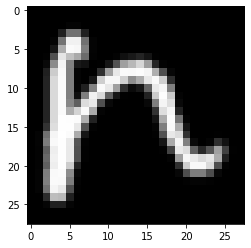

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [83]:
nn_input = train_images[x]
nn_output = np.zeros(47)
nn_output[train_labels[x]] = 1
print(train_labels[x])
img1 = train_images[x]
f_min, f_max = np.amin(img1), np.amax(img1)
img1 = (img1 - f_min) / (f_max - f_min)
plt.show(plt.imshow(img1, cmap='gray'))
print(nn_output)

In [72]:
def save_data(x):
    np.save('_cnn9 nn3 weights['+str(x)+"]k", nn1.weights)
    np.save('_cnn9 nn3 biases['+str(x)+"]k", nn1.biases)
    np.save('_cnn9 cnn1 filters['+str(x)+"]k", cnn1.filters)
    np.save('_cnn9 cnn1 biases['+str(x)+"]k", cnn1.biases)
    np.save('_cnn9 cnn2 filters['+str(x)+"]k", cnn2.filters)
    np.save('_cnn9 cnn2 biases['+str(x)+"]k", cnn2.biases)
    np.save('_cnn9 acc_tab_train['+str(x)+"]k", acc_tab_train)
    np.save('_cnn9 loss_tab_train['+str(x)+"]k", loss_tab_train)
    np.save('_cnn9 acc_tab_test['+str(x)+"]k", acc_tab_test)
    np.save('_cnn9 loss_tab_test['+str(x)+"]k", loss_tab_test)
    np.save('_cnn9 loss_stats['+str(x)+"]k", loss_stats)
    np.save('_cnn9 loss1_list['+str(x)+"]k", loss1_list)
    np.save('_cnn9 loss_stats2['+str(x)+"]k", loss_stats2)
    np.save('_cnn9 loss2_list['+str(x)+"]k", loss2_list)
    print("Zapisano")

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10 µs


In [ ]:
save_data(112500)

Zapisano


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
cnn1_filters = cnn1.filters
cnn1_biases = cnn1.biases
nn3_weights = nn3.weights
nn3_biases = nn3.biases

In [ ]:
print(lr.new_learning_rate)

0.05714285714285714


In [ ]:
def save_data2(x):
    np.save('acnn5 nn3 cnn1_filters start', cnn1_filters)
    np.save('acnn5 nn3 cnn1_biases start', cnn1_biases)
    np.save('acnn5 nn3 nn3_weights start', nn3_weights)
    np.save('acnn5 nn3 nn3_biases start', nn3_biases)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [ ]:
save_data2(0)

In [ ]:
print(loss.y_pred)
print(loss.y_pred2)

0.991370363063137
0.02109298644815185


In [ ]:
print(2.00000000e+00)
print(1e-8)

2.0
1e-08


In [ ]:
n1 = np.load('n2 nn3 weights[112499]k.npy')
n2 = np.load('an2 nn3 weights[0]k.npy')

In [171]:
"""MODUŁ TESTOWANIA"""
"""----------------------------------TEST Z POPRAWIONYM POOLINGIEM - CNN,NN,Pool,relu,--------------------------------------------------"""

for t in range(1):

    acc_tab_test = []
    loss_tab_test = []

    # ostateczny nn i cnn - najważniesze!
    for r in range(1):

        # ----------------------------------TEST DATASET--------------------------------------------------
        #nn + cnn + relu + maxpool
        loss_stats = [[] for x in range(47)]  # dla emnista
        test_bach_size = 18800
        range_num = 0
        acc = 0
        acc_fin = 0
        acc_fin_ult = 0
        i = 0
        y = 1
        l = 0

        for x in range(0, range_num+test_bach_size):
            nn_input = test_images[x]
            nn_output = np.zeros(47)  # dla emnista
            nn_output[test_labels[x]] = 1

            cnn1.conv_process(nn_input)  # CNN
            pool1.forwards(cnn1.conv_output)
            relu1.forwards(pool1.pooling_output)
            nn_input_flatten = (relu1.output).flatten()  # CNN
            nn1.forwards(nn_input_flatten)
            nn1_softmax.forwards(nn1.output)
            loss.forwards(nn1_softmax.exp_inputs_norm, nn_output)

            # NN loss
            print("Test iteration: " + str(x) + " | loss: " + str(loss.y_pred) +
                  " - label: " + str(test_labels[x]))  # !!!!!!!!!!!!!
            loss_stats[test_labels[x]].append(loss.y_pred)
            print("Train iteration: " + str(x) + " | loss 2: " + str(loss.y_pred2) +
                  " - label: " + str(train_labels[x]))  # !!!!!!!!!!!!!

            acc = 1 if np.argmax(
                nn1_softmax.exp_inputs_norm) == test_labels[x] else 0
            acc_fin += acc
            l += loss.y_pred

        acc_tab_test.append(acc_fin/test_bach_size)
        loss_tab_test.append(l/test_bach_size)

        acc_fin = acc_fin/test_bach_size

        print("Accuracy:", acc_fin*100, "% Loss:", l/test_bach_size)
        print("-------------------------")

print("ACC FIN ULT", acc_fin_ult/10000)

Test iteration: 0 | loss: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         5.44349821
 0.         0.         0.         0.         0.        ] - label: 41
Train iteration: 0 | loss 2: 0.11581911084794938 - label: 45
Test iteration: 1 | loss: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         4.9641273

KeyboardInterrupt: 

In [ ]:
cnn_wyniki_filtry_startowe = ConvolutionalLayer(10, 3, 3, 1, 1, 1)
cnn_wyniki = ConvolutionalLayer(10, 3, 3, 1, 1, 1)

(10, 28, 28)
(28, 28)
0


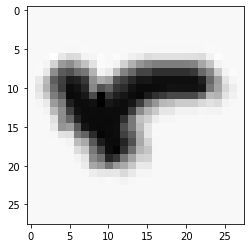

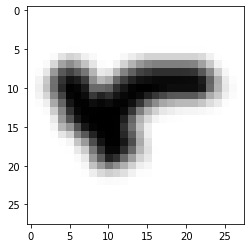

-----------------------------------------------
1


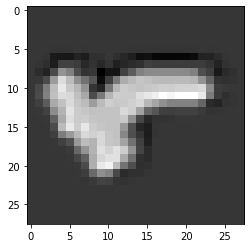

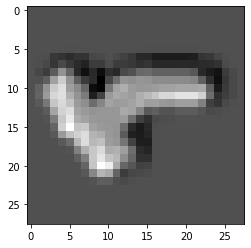

-----------------------------------------------
2


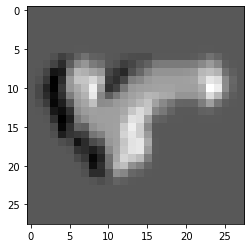

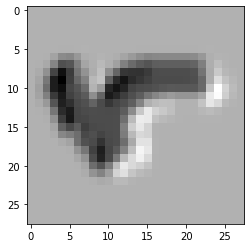

-----------------------------------------------
3


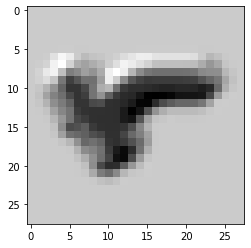

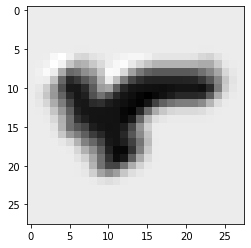

-----------------------------------------------
4


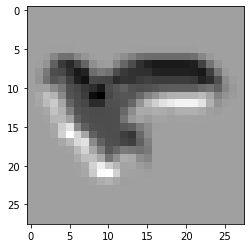

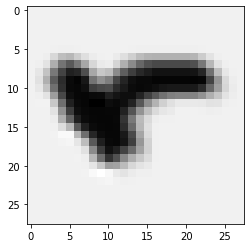

-----------------------------------------------
5


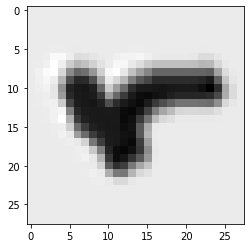

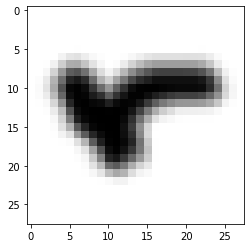

-----------------------------------------------
6


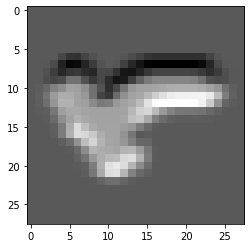

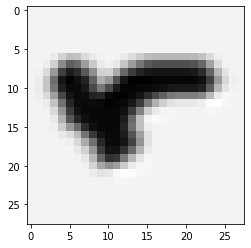

-----------------------------------------------
7


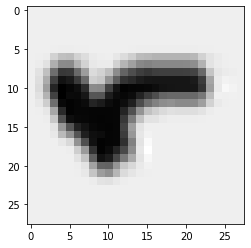

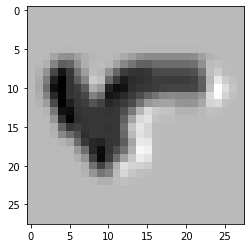

-----------------------------------------------
8


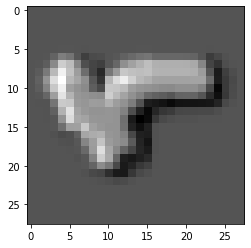

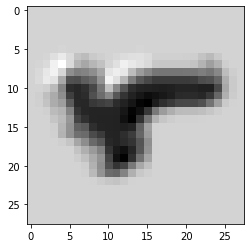

-----------------------------------------------
9


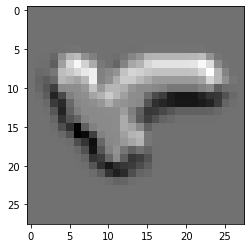

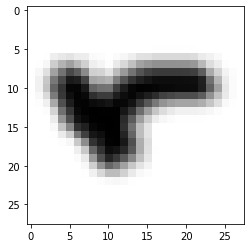

-----------------------------------------------


In [ ]:
cnn_wyniki_filtry_startowe.filters = cnn_filters_start
cnn_wyniki.filters = cnn1.filters
cnn_wyniki_filtry_startowe.conv_process(train_images[0])
cnn_wyniki.conv_process(train_images[0])

print(cnn_wyniki_filtry_startowe.conv_output.shape)
print((cnn_wyniki_filtry_startowe.conv_output[0]).shape)
for x in range(10):
    print(x)
    img1 = cnn_wyniki_filtry_startowe.conv_output[x]
    f_min, f_max = img1.min(), img1.max()
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))

    img2 = cnn_wyniki.conv_output[x]
    f_min, f_max = img2.min(), img2.max()
    img2 = (img2 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img2, cmap='gray'))
    print("-----------------------------------------------")


start filter


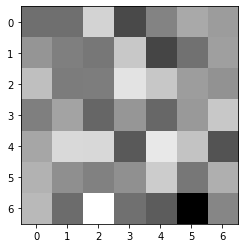

end filters


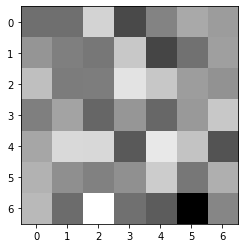

--------------------------------------------------------------

start filter


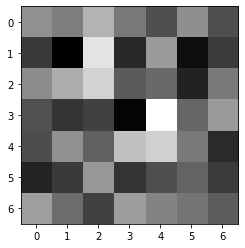

end filters


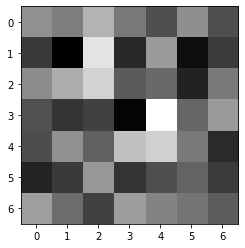

--------------------------------------------------------------

start filter


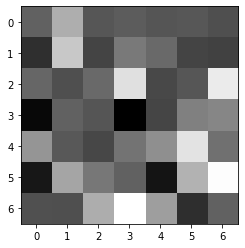

end filters


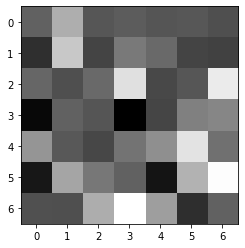

--------------------------------------------------------------

start filter


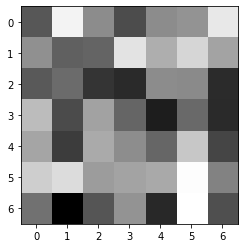

end filters


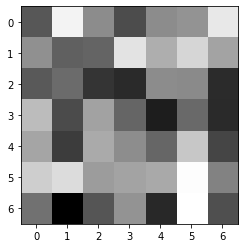

--------------------------------------------------------------

start filter


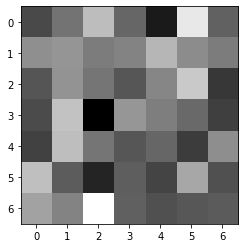

end filters


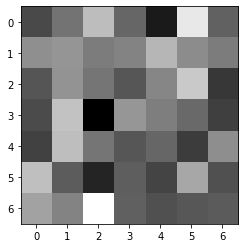

--------------------------------------------------------------

start filter


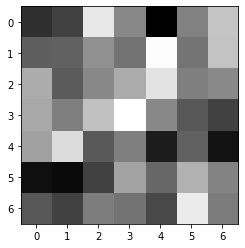

end filters


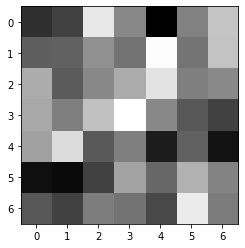

--------------------------------------------------------------

start filter


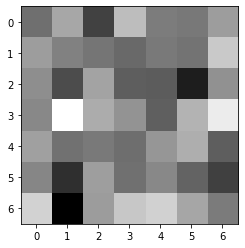

end filters


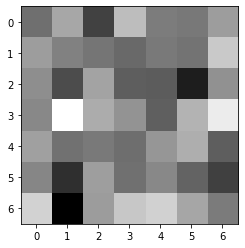

--------------------------------------------------------------

start filter


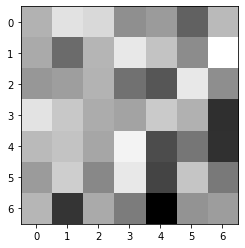

end filters


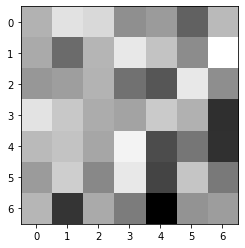

--------------------------------------------------------------

start filter


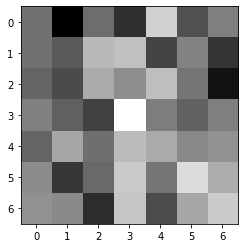

end filters


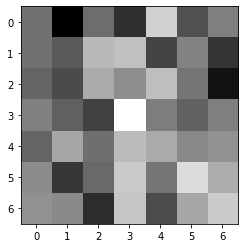

--------------------------------------------------------------

start filter


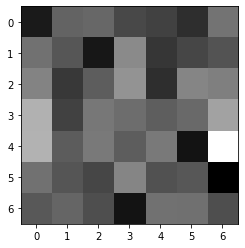

end filters


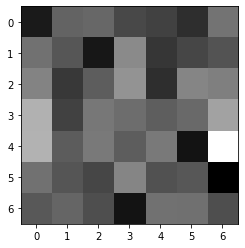

--------------------------------------------------------------

start filter


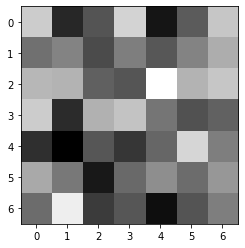

end filters


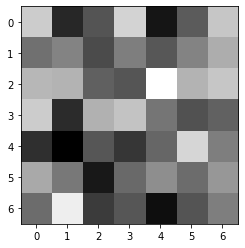

--------------------------------------------------------------

start filter


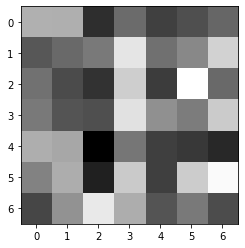

end filters


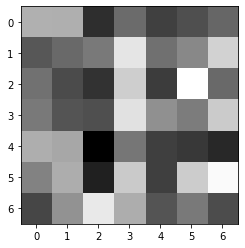

--------------------------------------------------------------

start filter


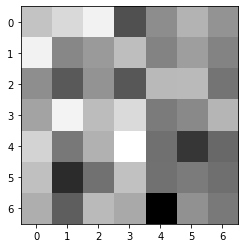

end filters


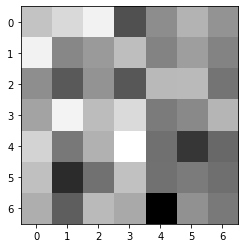

--------------------------------------------------------------

start filter


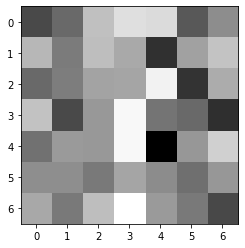

end filters


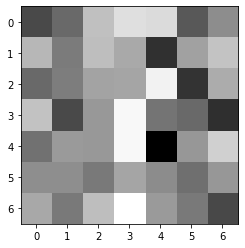

--------------------------------------------------------------

start filter


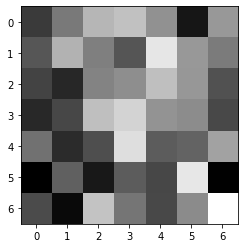

end filters


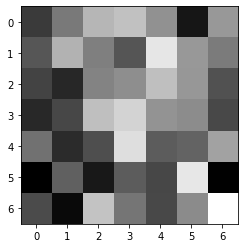

--------------------------------------------------------------

start filter


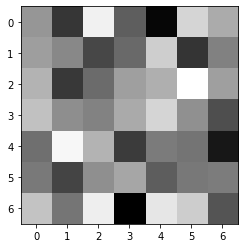

end filters


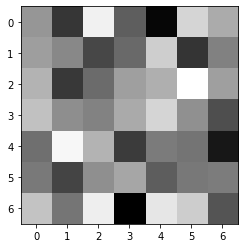

--------------------------------------------------------------

start filter


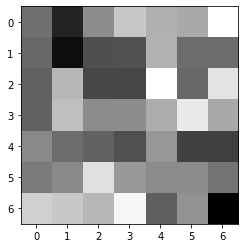

end filters


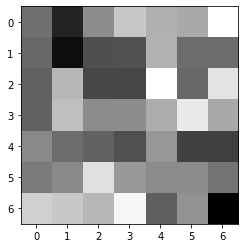

--------------------------------------------------------------

start filter


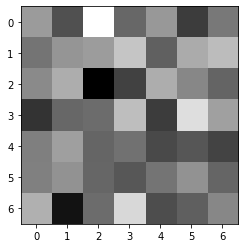

end filters


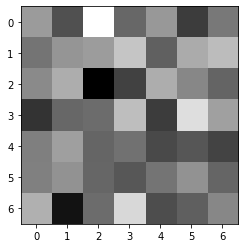

--------------------------------------------------------------

start filter


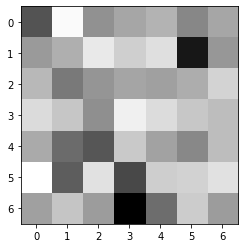

end filters


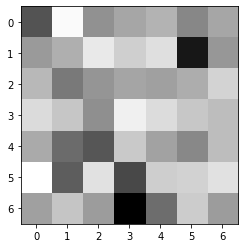

--------------------------------------------------------------

start filter


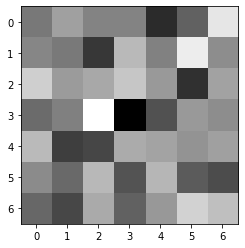

end filters


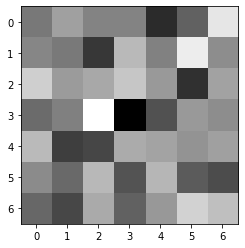

--------------------------------------------------------------

start filter


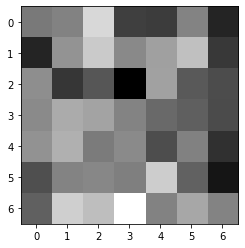

end filters


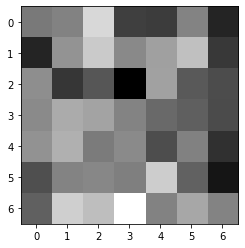

--------------------------------------------------------------

start filter


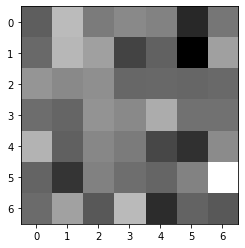

end filters


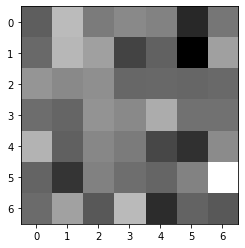

--------------------------------------------------------------

start filter


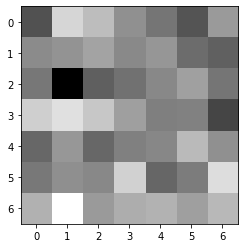

end filters


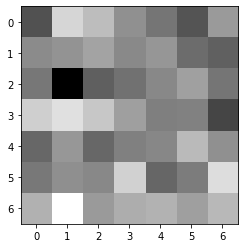

--------------------------------------------------------------

start filter


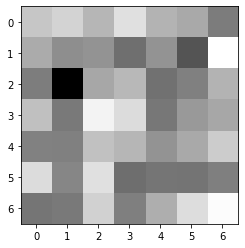

end filters


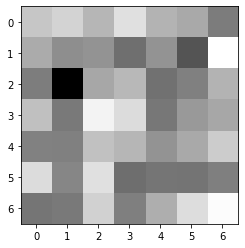

--------------------------------------------------------------

start filter


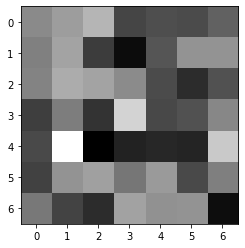

end filters


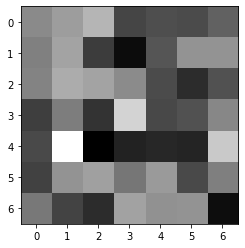

--------------------------------------------------------------

start filter


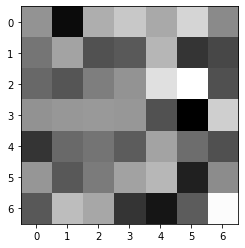

end filters


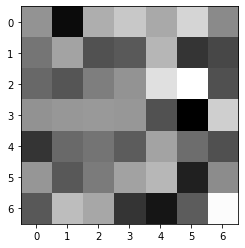

--------------------------------------------------------------

start filter


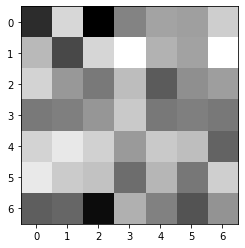

end filters


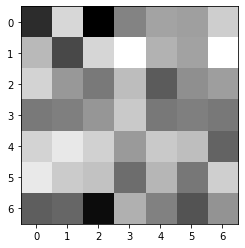

--------------------------------------------------------------

start filter


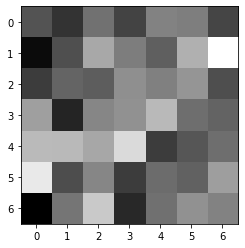

end filters


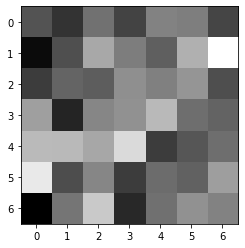

--------------------------------------------------------------


In [282]:
for x in range(cnn1.filters.shape[0]):
    print("\nstart filter")
    img1 = cnn1.filters[x][0]
    f_min, f_max = np.amin(img1), np.amax(img1)
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))
    print("end filters")
    img2 = cnn1.filters[x][0]
    f_min, f_max = np.amin(img2), np.amax(img2)
    img2 = (img2 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img2, cmap='gray'))
    print("--------------------------------------------------------------")


cnn1 filter


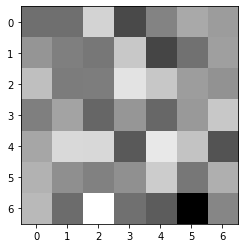


cnn1 filter


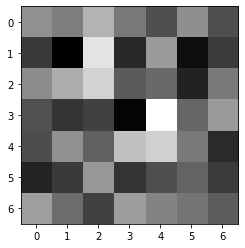


cnn1 filter


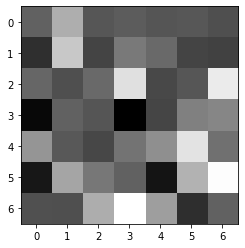


cnn1 filter


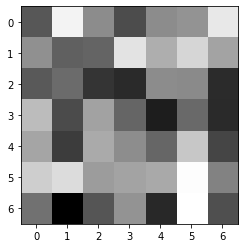


cnn1 filter


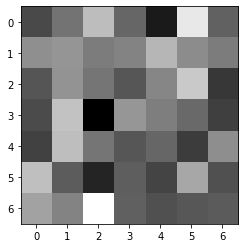


cnn1 filter


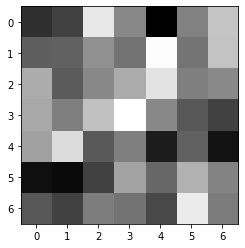


cnn1 filter


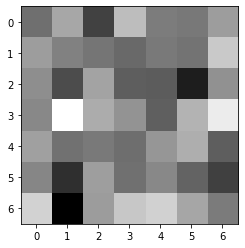


cnn1 filter


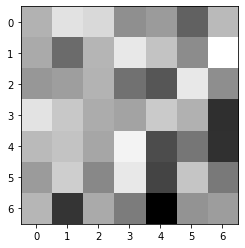


cnn1 filter


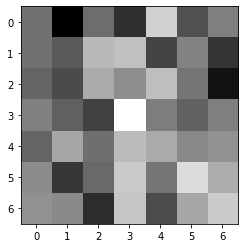


cnn1 filter


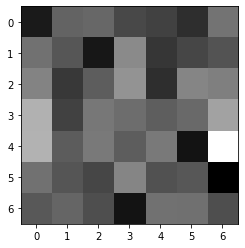


cnn1 filter


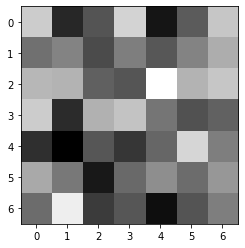


cnn1 filter


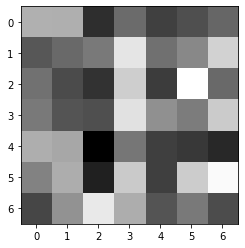


cnn1 filter


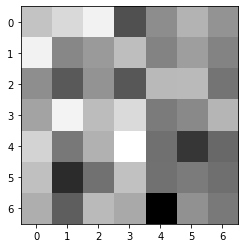


cnn1 filter


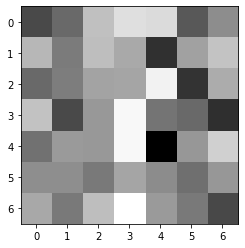


cnn1 filter


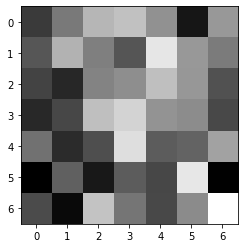


cnn1 filter


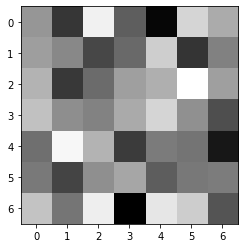


cnn1 filter


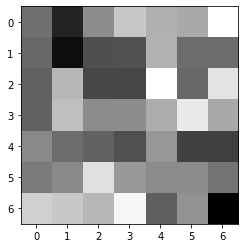


cnn1 filter


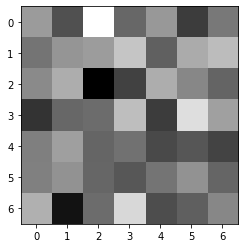


cnn1 filter


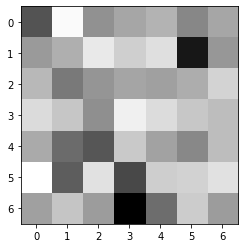


cnn1 filter


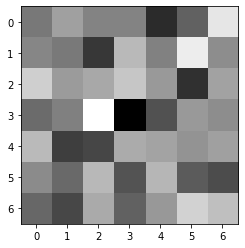


cnn1 filter


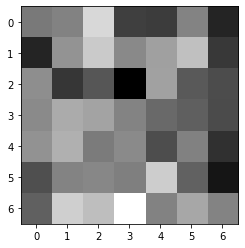


cnn1 filter


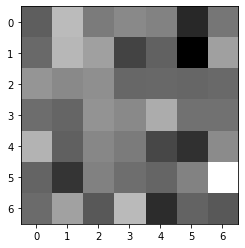


cnn1 filter


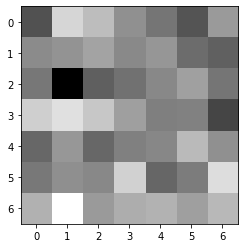


cnn1 filter


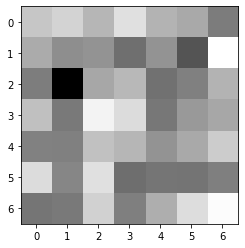


cnn1 filter


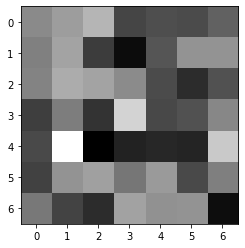


cnn1 filter


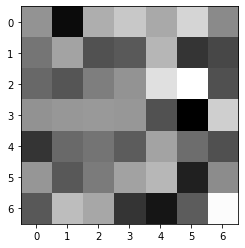


cnn1 filter


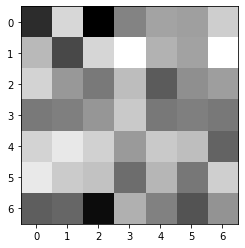


cnn1 filter


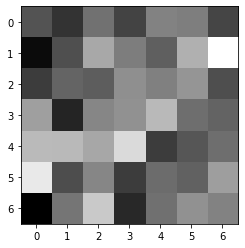

CPU times: user 6.32 s, sys: 163 ms, total: 6.48 s
Wall time: 6.98 s


In [283]:
for x in range(cnn1.filters.shape[0]):
    print("\ncnn1 filter")
    img1 = cnn1.filters[x][0]
    f_min, f_max = np.amin(img1), np.amax(img1)
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))


cnn1 filter


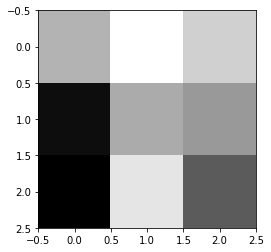


cnn1 filter


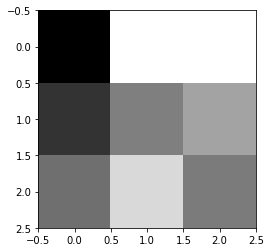


cnn1 filter


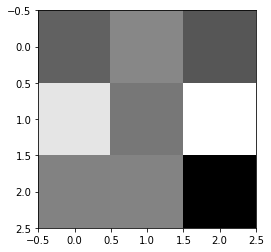


cnn1 filter


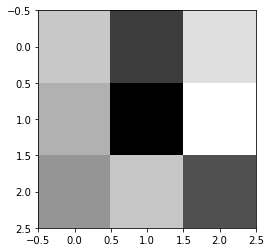


cnn1 filter


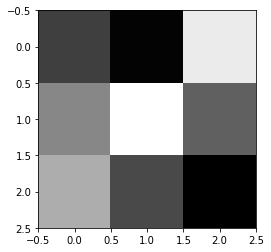


cnn1 filter


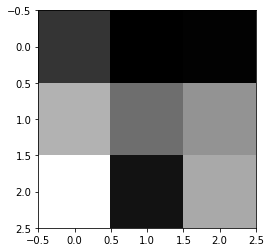


cnn1 filter


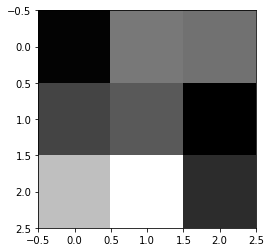


cnn1 filter


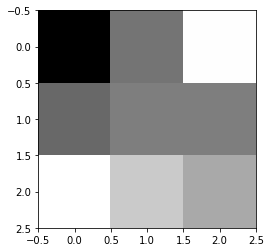


cnn1 filter


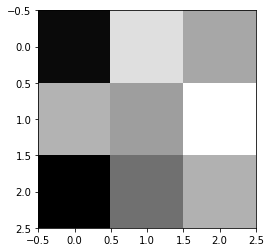


cnn1 filter


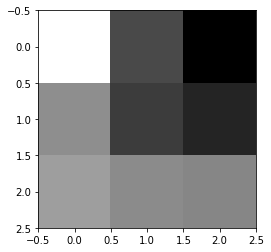


cnn1 filter


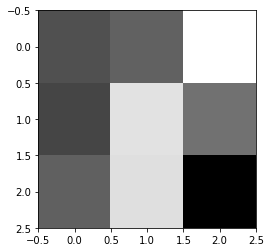


cnn1 filter


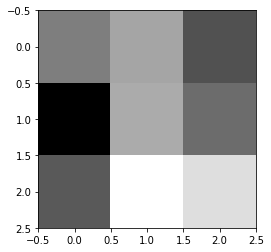


cnn1 filter


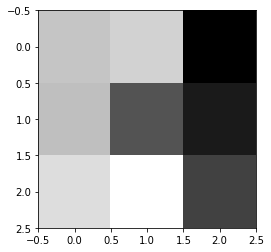


cnn1 filter


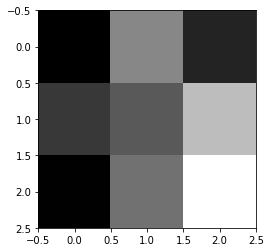

CPU times: user 3.35 s, sys: 48.1 ms, total: 3.4 s
Wall time: 3.75 s


In [284]:
for x in range(cnn2.filters.shape[0]):
    print("\ncnn1 filter")
    img1 = cnn2.filters[x][0]
    f_min, f_max = np.amin(img1), np.amax(img1)
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))